------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** Data assumed to be collected in the year 2016.

### **Loading Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### **Load the data**

In [2]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

### **Check the shape of the data**

In [3]:
# Print the shape of the data
data.shape

(2240, 27)

### **Understand the data by observing a few rows**

In [4]:
# View first 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [5]:
# View last 5 rows 
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


### **Check the data types and and missing values of each column** 

In [6]:
# Check the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Find the percentage of missing values in each column of the data
data.isnull().sum()/len(data)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

We can observe that `ID` has no null values. Also the number of unique values are equal to the number of observations. So, `ID` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

**Dropping the ID column**

In [8]:
# Remove ID column from data
data.drop(columns = ["ID"], inplace = True)


In [9]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


## **Exploratory Data Analysis**

### **Explore the summary statistics of numerical variables**

In [10]:
# Explore basic summary statistics of numeric variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


### **Explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [11]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

**Number of unique observations in each category**

In [12]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].value_counts())
    print("*" * 50)
    

Unique values in Education are :
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Kidhome are :
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
**************************************************
Unique values in Teenhome are :
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
**************************************************
Unique values in Complain are :
0    2219
1      21
Name: Complain, dtype: int64
**************************************************


### **Replacing  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [13]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace("2n Cycle", "Master", inplace = True)
data["Education"].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [14]:
# Replace the categories "Alone", "Absurd", "YOLO" with the category "Single"

data["Marital_Status"].replace(("Alone", "Absurd", "YOLO"), "Single", inplace = True)  
data["Marital_Status"].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

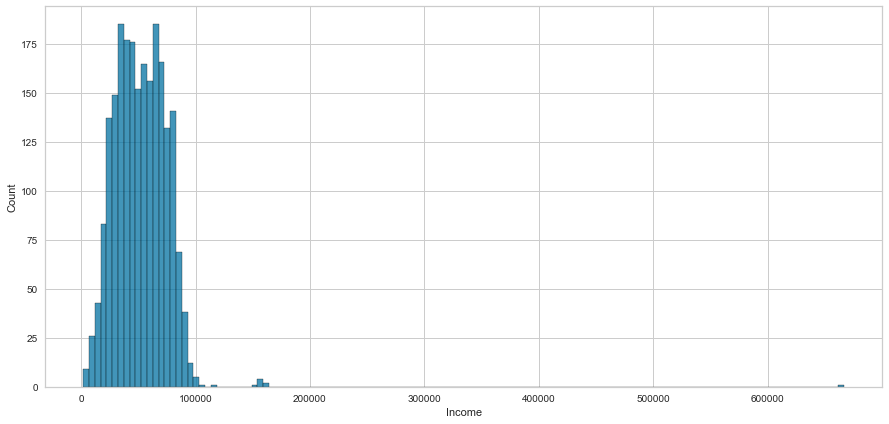

In [15]:
# Create histogram for the Income feature

plt.figure(figsize=(15, 7))
sns.histplot(x="Income", data=data)
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.** 

<AxesSubplot:xlabel='Income'>

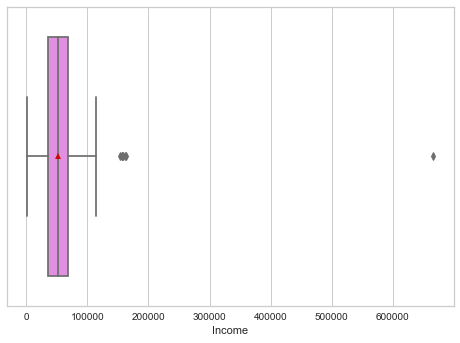

In [16]:
# Plot the boxplot
sns.boxplot(data=data, x="Income", showmeans=True, color="violet")

In [17]:
# Calculating the upper whisker for the Income variable

Q1 = data['Income'].quantile(q=0.25)                          # Finding the first quartile

Q3 = data['Income'].quantile(q=0.75)                          # Finding the third quartile

IQR = Q3-Q1                                       # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)#[________]          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [18]:
# Check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,22,0,0,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,1,1,0,0,0,0,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,1,1,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,28,0,1,0,0,0,0,0,0,0
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,0,0,0,0,0
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,1,3,6,0,0,0,0,0,0,0


In [19]:
# Check the 99.5% percentile value for the Income variable
data.quantile(q=0.995)['Income']

102145.75000000003

In [20]:
# Dropping observations identified as outliers 
data.drop(index=[164,617,655,687,1300,1653,2132,2233], inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2232 non-null   int64  
 1   Education            2232 non-null   object 
 2   Marital_Status       2232 non-null   object 
 3   Income               2208 non-null   float64
 4   Kidhome              2232 non-null   int64  
 5   Teenhome             2232 non-null   int64  
 6   Dt_Customer          2232 non-null   object 
 7   Recency              2232 non-null   int64  
 8   MntWines             2232 non-null   int64  
 9   MntFruits            2232 non-null   int64  
 10  MntMeatProducts      2232 non-null   int64  
 11  MntFishProducts      2232 non-null   int64  
 12  MntSweetProducts     2232 non-null   int64  
 13  MntGoldProds         2232 non-null   int64  
 14  NumDealsPurchases    2232 non-null   int64  
 15  NumWebPurchases      2232 non-null   i

**Check the distribution of the Income variable after dropping outliers.**

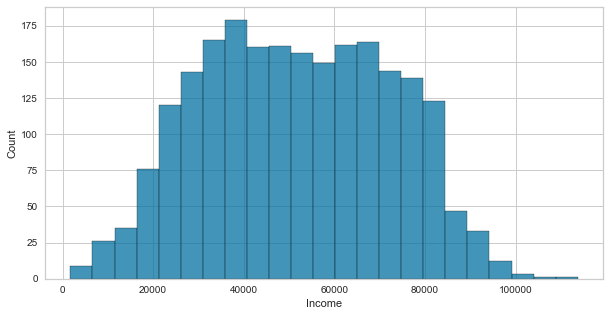

In [22]:
# Plot histogram and 'Income'
plt.figure(figsize=(10, 5))
sns.histplot(x="Income", data=data)
plt.show()

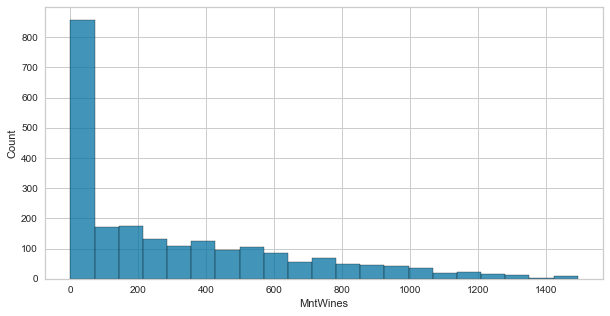

In [23]:
# Plot the histogram for 'MntWines'
plt.figure(figsize=(10, 5))
sns.histplot(x="MntWines", data=data)
plt.show()

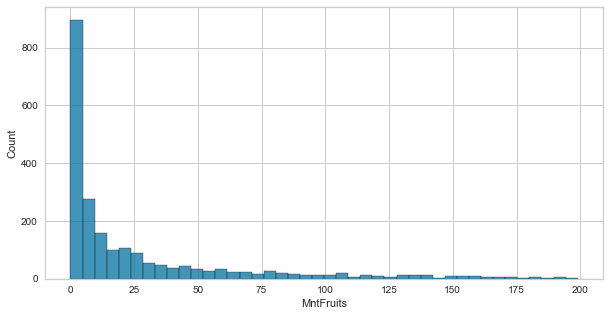

In [24]:
# Plot the histogram for 'MntFruits'
plt.figure(figsize=(10, 5))
sns.histplot(x="MntFruits", data=data)
plt.show()

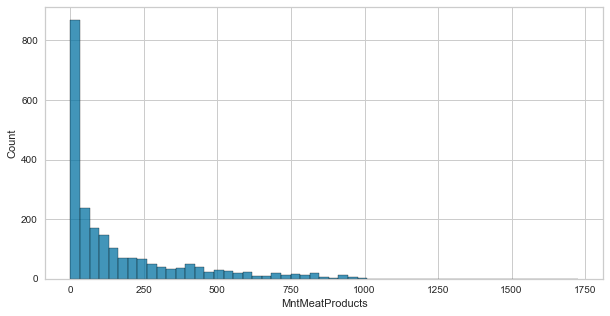

In [25]:
# Plot the histogram for 'MntMeatProducts' 
plt.figure(figsize=(10, 5))
sns.histplot(x="MntMeatProducts", data=data)
plt.show()

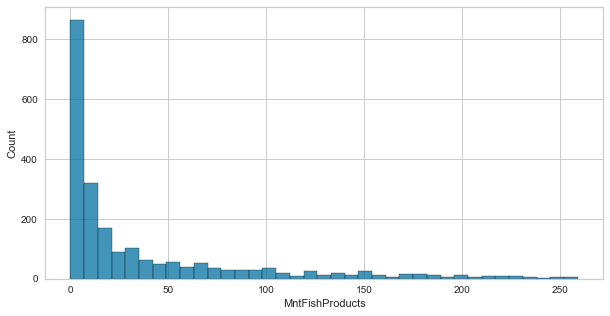

In [26]:
# Plot the histogram for 'MntFishProducts'
plt.figure(figsize=(10, 5))
sns.histplot(x="MntFishProducts", data=data)
plt.show()

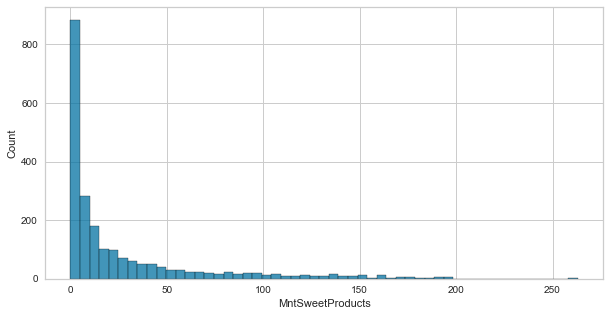

In [27]:
# Plot the histogram for 'MntSweetProducts'
plt.figure(figsize=(10, 5))
sns.histplot(x="MntSweetProducts", data=data)
plt.show()

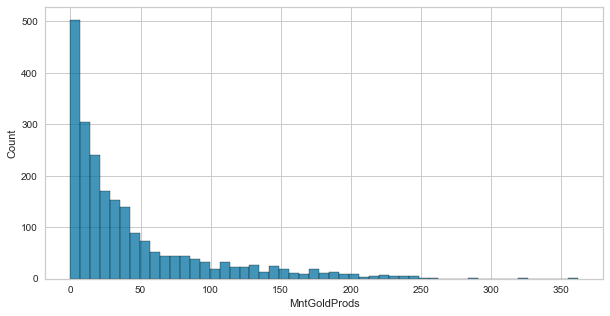

In [28]:
# Plot the histogram for 'MntGoldProds'
plt.figure(figsize=(10, 5))
sns.histplot(x="MntGoldProds", data=data)
plt.show()

## **2. Univariate analysis - Categorical Data**

Function that takes the categorical column as the input and returns the bar plot for the variable that indicate the percentage for each category

In [29]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage 
    
    plt.show()                                                    # Show the plot

#### Plot barplot for the variable Marital_Status

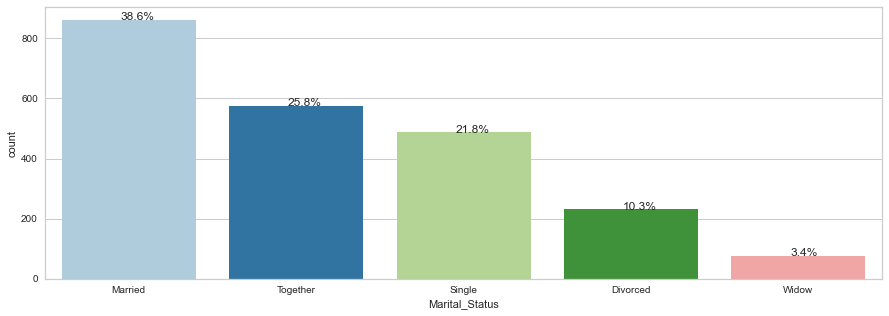

In [30]:
# Bar plot for 'Marital_Status'
perc_on_bar('Marital_Status')

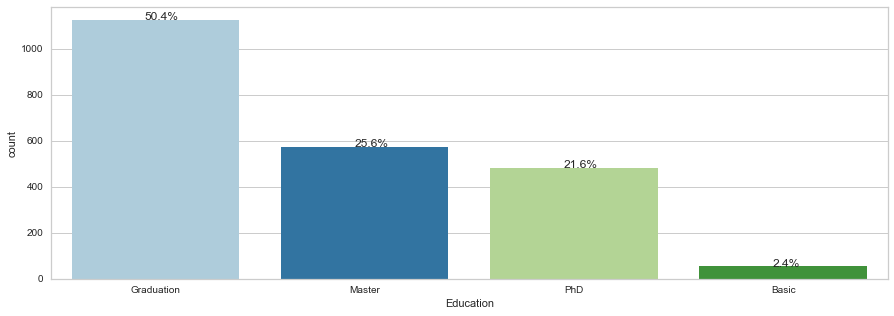

In [31]:
perc_on_bar('Education')

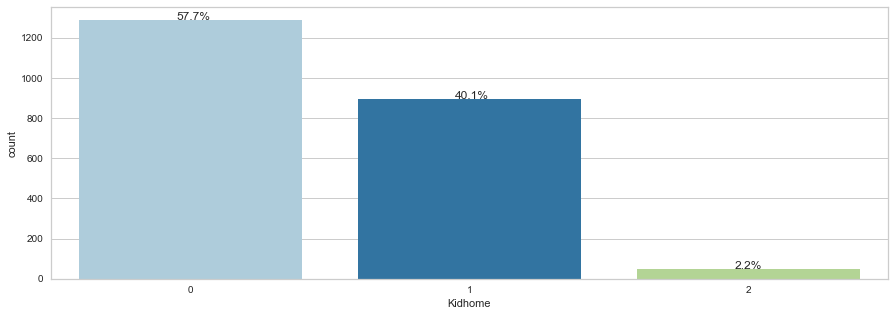

In [32]:
perc_on_bar('Kidhome')

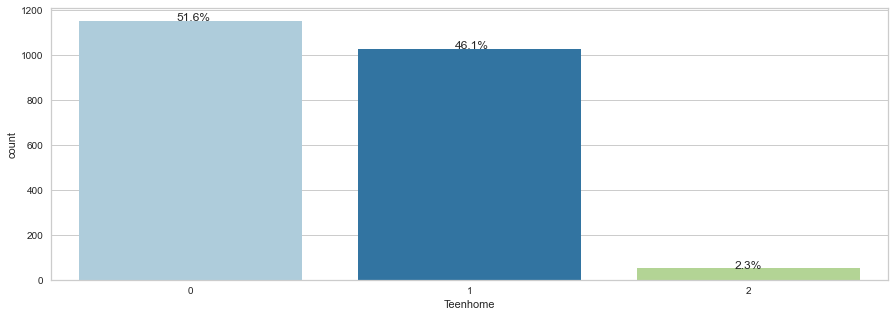

In [33]:
perc_on_bar('Teenhome')

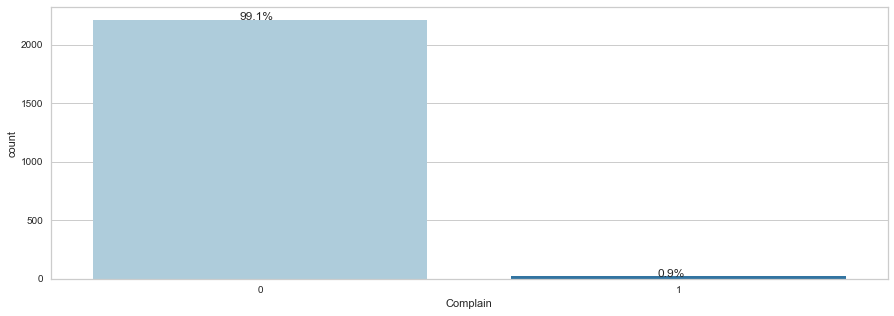

In [34]:
perc_on_bar('Complain')

## **Bivariate Analysis**

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

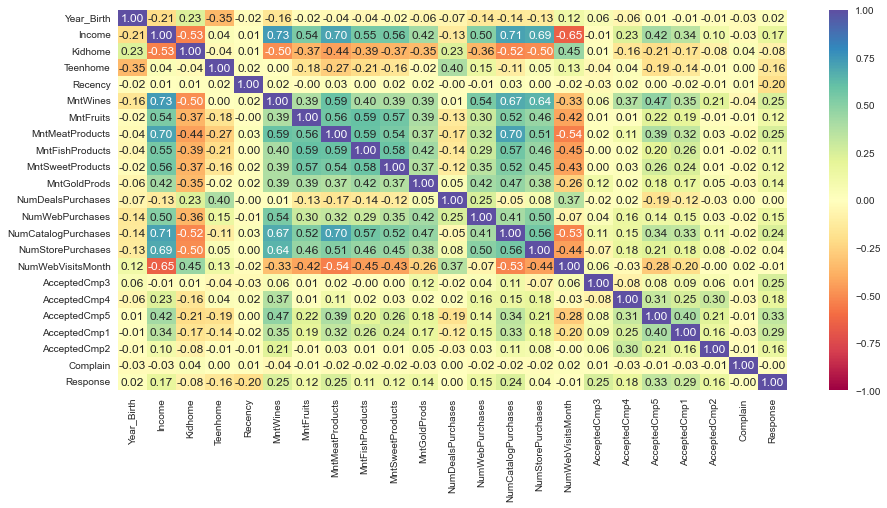

In [35]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

**The above correlation heatmap only shows the relationship between numerical variables. Check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


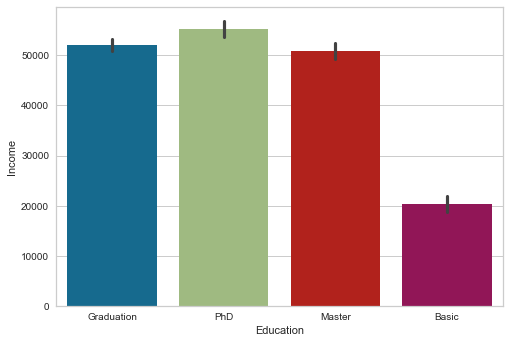

In [36]:
print(sns.barplot(x='Education', y='Income', data=data))

### **Marital Status Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


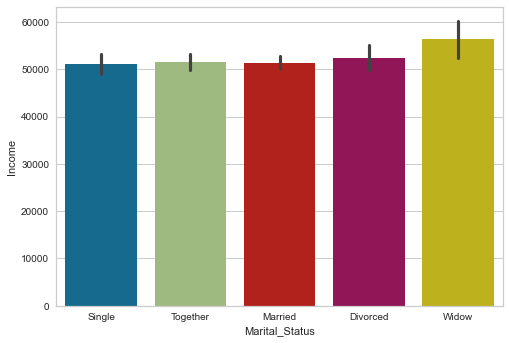

In [37]:
# Plot the bar plot for Marital_Status and Income
print(sns.barplot(x='Marital_Status', y='Income', data=data))

### **Kidhome Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


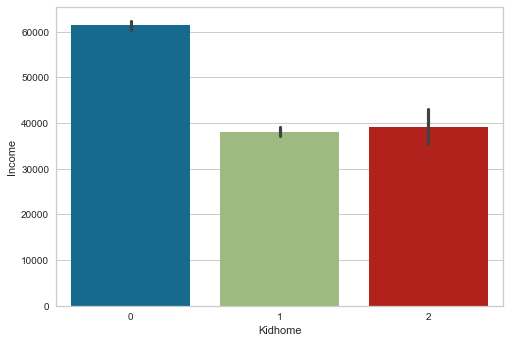

In [38]:
# Plot the bar plot for Kidhome and Income
print(sns.barplot(x='Kidhome', y='Income', data=data))

**We can also visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

<AxesSubplot:xlabel='Marital_Status'>

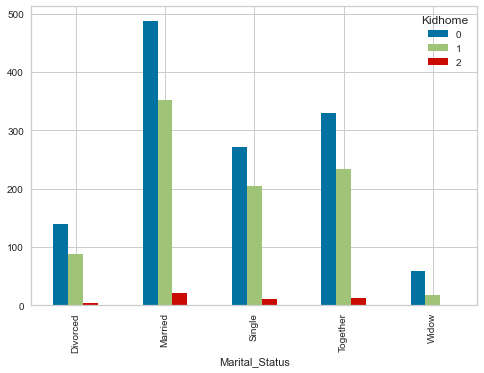

In [39]:
# Plot the bar plot for Marital_Status and Kidhome
pd.crosstab(data['Marital_Status'],data['Kidhome']).plot(kind='bar',stacked=False)

## **Feature Engineering and Data Processing**

Prepare dataset for analysis.
- Creating new columns
- Imputing missing values

### **Age** 

In [40]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give the age of the customer at the time of data collection in 2016

data["Age"] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

In [41]:
# Drop the observations with age > 115
data.drop(data[data['Age'] > 115].index, inplace = True)
data["Age"].sort_values()                                         

1170    20
46      20
2213    21
696     21
995     21
        ..
39      73
358     73
894     73
424     75
1950    76
Name: Age, Length: 2229, dtype: int64

**Check the distribution of age in the data.**

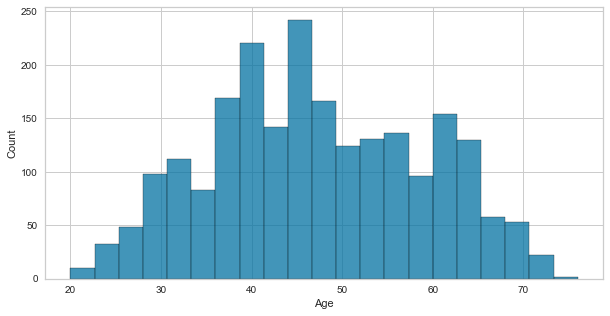

In [42]:
# Plot histogram to check the distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(x="Age", data=data)
plt.show()

### **Kids** 
* Feature "Kids" indicating the total kids and teens in the home

In [43]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
data["Kids"] = data['Kidhome'] + data["Teenhome"]
print(data[["Kids", "Kidhome", "Teenhome"]].head())

   Kids  Kidhome  Teenhome
0     0        0         0
1     2        1         1
2     0        0         0
3     1        1         0
4     1        1         0


### **Family Size**
* New variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [44]:
# Check the unique categories in Marital_Status
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* Combine the sub-categories Single, Divorced, Widow as "Single" and combine the sub-categories Married and Together as "Relationship" 
* Create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Use the Kids (calculated above) and the Status column to find the family size.

In [45]:
data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,59,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,62,2
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,51,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,32,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,35,1
5,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,6,0,0,0,0,0,0,0,49,1
6,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,6,0,0,0,0,0,0,0,45,1
7,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,8,0,0,0,0,0,0,0,31,1
8,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,9,0,0,0,0,0,0,1,42,1
9,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,...,20,1,0,0,0,0,0,0,66,2


In [46]:
# Replace "Married" and "Together" with "Relationship"
data["Marital_Status"].replace(["Married", "Together"], "Relationship", inplace = True)

In [47]:
# Replace "Divorced" and "Widow" with "Single"
data['Marital_Status'].replace(["Widow", "Divorced"], "Single", inplace = True)

In [48]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data["Status"] = data["Marital_Status"].replace({"Single": 1, "Relationship": 2}) 

In [49]:
# Add two variables Status and Kids to get the total number of persons in each family
data["Family_Size"] = data["Status"] + data["Kids"]
print(data[["Status", "Kids", "Family_Size"]].head(10))

   Status  Kids  Family_Size
0       1     0            1
1       1     2            3
2       2     0            2
3       2     1            3
4       2     1            3
5       2     1            3
6       1     1            2
7       2     1            3
8       2     1            3
9       2     2            4


### **Expenses** 
* New feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [50]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data["Expenses"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data[["Expenses",'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head()

,Expenses,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15


### **Total Purchases**
* New feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [51]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data["NumTotalPurchases"] = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

### **Engaged in Days**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [52]:
# Converting Dt_customer variable to Python date time object
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"]) 

**Check the max and min of the date.**

In [53]:
# Check the minimum of the date

data["Dt_Customer"].min()

Timestamp('2012-01-08 00:00:00')

In [54]:
# Check the maximum of the date

data["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')


It can be observed that the last customer enrollment date is December 6th, 2014. We can extract the number of days a customer has been with the company using some date as the threshold such as January 1st, 2015

In [55]:
 # Assigning date to the day variable
data["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
data["day"] = pd.to_datetime(data.day)              

In [56]:
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### **TotalAcceptedCmp**
* New feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [57]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data["TotalAcceptedCmp"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"] 

### **AmountPerPurchase**
* New feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [58]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
data['AmountPerPurchase'] = data["Expenses"]/data["NumTotalPurchases"]
print(data['AmountPerPurchase'])

0       64.680000
1        4.500000
2       36.952381
3        6.625000
4       22.210526
          ...    
2235    74.500000
2236    20.181818
2237    65.315789
2238    36.652174
2239    15.636364
Name: AmountPerPurchase, Length: 2229, dtype: float64


**Check the maximum value of the AmountPerPurchase.**

In [59]:
# Check the max value

data['AmountPerPurchase'].max()

inf

In [60]:
# Find how many observations have NumTotalPurchases equal to 0
(data['NumTotalPurchases'] == 0).value_counts()

False    2227
True        2
Name: NumTotalPurchases, dtype: int64

In [61]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices
print(data.index[data['NumTotalPurchases']==0].tolist())
print(data.drop(data[data['NumTotalPurchases']==0].index, inplace = True))
data.info()

[981, 1524]
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2227 non-null   int64         
 1   Education            2227 non-null   object        
 2   Marital_Status       2227 non-null   object        
 3   Income               2203 non-null   float64       
 4   Kidhome              2227 non-null   int64         
 5   Teenhome             2227 non-null   int64         
 6   Dt_Customer          2227 non-null   datetime64[ns]
 7   Recency              2227 non-null   int64         
 8   MntWines             2227 non-null   int64         
 9   MntFruits            2227 non-null   int64         
 10  MntMeatProducts      2227 non-null   int64         
 11  MntFishProducts      2227 non-null   int64         
 12  MntSweetProducts     2227 non-null   int64         
 13  MntGoldProds    

In [62]:
data['AmountPerPurchase'].max()

1679.0

**Check the distribution of values in AmountPerPurchase column.**

In [63]:
# Check the summary statistics of the AmountPerPurchase variable 
data['AmountPerPurchase'].describe()

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

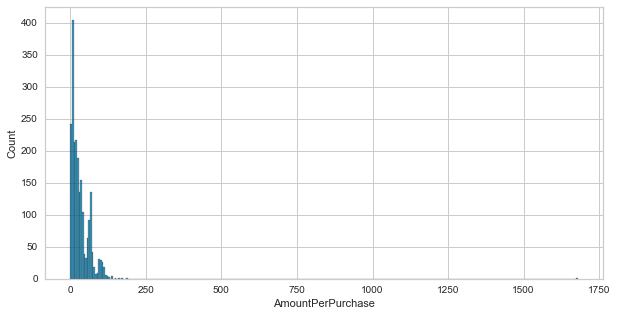

In [64]:
# Plot the histogram for the AmountPerPurchase variable
plt.figure(figsize=(10, 5))
sns.histplot(x="AmountPerPurchase", data=data)
plt.show()

### **Imputing Missing Values**

In [65]:
# Impute the missing values for the Income variable with the median
data['Income'].fillna(data['Income'].median(), inplace = True)


**Done with data preprocessing. Visualize new features against the new income variable after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

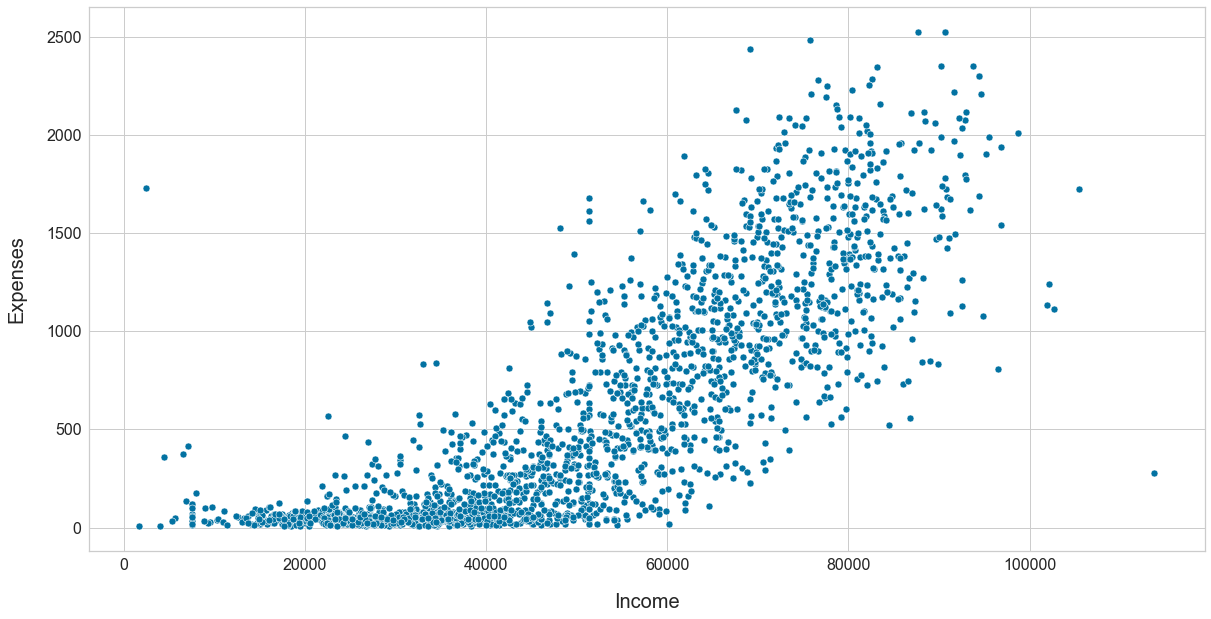

In [66]:
# Plotting the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(x = "Income", y = 'Expenses', data = data)

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

### **Family Size Vs Income**

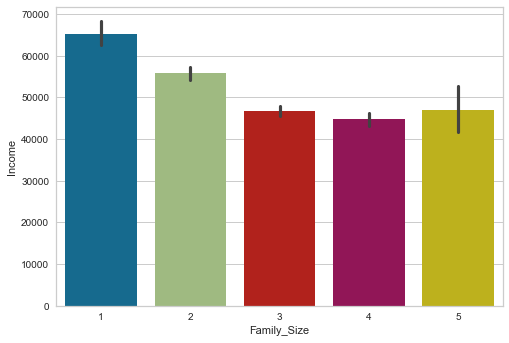

In [67]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis
ax = sns.barplot(x="Family_Size", y="Income", data=data)


# **Customer Segmentation**

## Preparing Data for Segmentation

### Dropping columns that we will not use for segmentation

The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.

Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

Here, we will use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. In addition to this, we need to drop some other columns which are mentioned below.

* `Dt_Customer`: We have created the `Engaged_in_days` variable using the Dt_Customer variable. Hence, we can drop this variable as it will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Hence, we can drop this variable. 
* `day`:  We have created the `Engaged_in_days` variable using the 'day' variable. Hence, we can drop this variable as it will not help with segmentation.
* `Status`: This column was created just to get the `Family_Size` variable that contains the information about the Status. Hence, we can drop this variable.
* We also need to drop categorical variables like `Education` and `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome` as distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
* We can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` for which we have create the variable `TotalAcceptedCmp` which is the aggregate of all these variables.

In [68]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [69]:
# Check the shape of new data 
data_model.shape

(2227, 17)

In [70]:
# Check first five rows of new data
data_model.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
0,58,635,88,546,172,88,88,3,8,10,4,7,1617,25,997,1,64.680000
1,38,11,1,6,2,1,6,2,1,1,2,5,27,6,151,0,4.500000
2,26,426,49,127,111,21,42,1,8,2,10,4,776,21,498,0,36.952381
3,26,11,4,20,10,3,5,2,2,0,4,6,53,8,91,0,6.625000
4,94,173,43,118,46,27,15,5,5,3,6,5,422,19,347,0,22.210526


**Correlation plot after removing the irrelevant variables.**

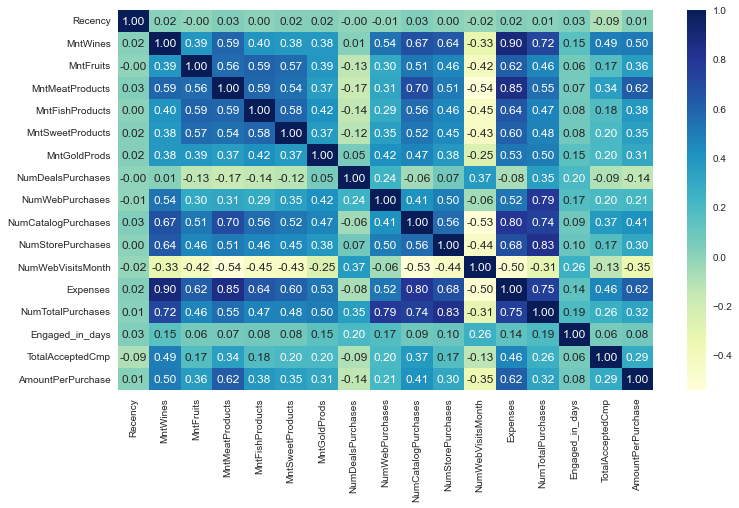

In [71]:
# Plot the correlation plot for new data
plt.figure(figsize = (12, 7))

sns.heatmap(data_model.corr(), annot = True, fmt = '.2f', cmap = "YlGnBu")

plt.show()

**Observations and Insights:**

### Scaling the Data

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range. Example:

If you have multiple independent variables like Age, Income, and Amount related variables, with their range as (18–100 Years), (25K–75K), and (100–200), respectively, feature scaling would help them all to be in the same range.

Feature scaling is important in Unsupervised Learning.

Feature scaling is especially relevant in machine learning models that compute some sort of distance metric as we do in most clustering algorithms, for example, K-Means. 

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

**Scale the data**

**Standard Scaler**: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

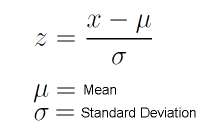

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [72]:
# Applying standard scaler on new data
scaler = StandardScaler()                                                 # Initialize the Standard Scaler

df_scaled = scaler.fit_transform(data_model)             # fit_transform the scaler function on new data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)      # Converting the embeddings to a dataframe

df_scaled.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
0,0.306906,0.979274,1.549793,1.735137,2.455586,1.471064,0.841828,0.357919,1.404892,2.633008,-0.561330,0.696875,1.682349,1.329371,1.975678,0.619416,0.697428
1,-0.384035,-0.873925,-0.638021,-0.726901,-0.652191,-0.633425,-0.732464,-0.169952,-1.119121,-0.586255,-1.178960,-0.135935,-0.963691,-1.167064,-1.667464,-0.503906,-0.638991
2,-0.798600,0.358572,0.569049,-0.175222,1.340442,-0.149634,-0.041311,-0.697824,1.404892,-0.228559,1.291559,-0.552339,0.282777,0.803806,-0.173173,-0.503906,0.081680
3,-0.798600,-0.873925,-0.562579,-0.663070,-0.505942,-0.585045,-0.751662,-0.169952,-0.758548,-0.943951,-0.561330,0.280470,-0.920422,-0.904281,-1.925843,-0.503906,-0.591801
4,1.550599,-0.392806,0.418165,-0.216256,0.152175,-0.004497,-0.559676,1.413662,0.323172,0.129137,0.056299,-0.135935,-0.306341,0.541023,-0.823427,-0.503906,-0.245693


## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

<AxesSubplot:xlabel='0', ylabel='1'>

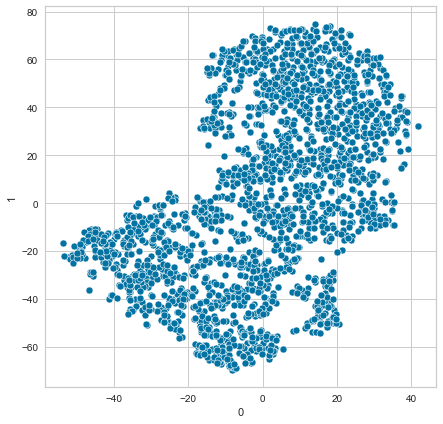

In [73]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed

# Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

# fit_transform T-SNE on new data
data_tsne = tsne.fit_transform(df_scaled)

data_tsne = pd.DataFrame(data_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe


plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_tsne)                             # Plotting T-SNE

### **Applying PCA**

When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). PCA can be used to reduce the multicollinearity between the variables. 

In [74]:
# Defining the number of principal components to generate
n = df_scaled.shape[1]                                        # Storing the number of variables in the data


pca = PCA(n_components = n, random_state = 1)             # Initialize PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))                      # fit_transform PCA on the scaled data


# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

**Plotting the first two components and see how the data points are distributed.**

<AxesSubplot:xlabel='0', ylabel='1'>

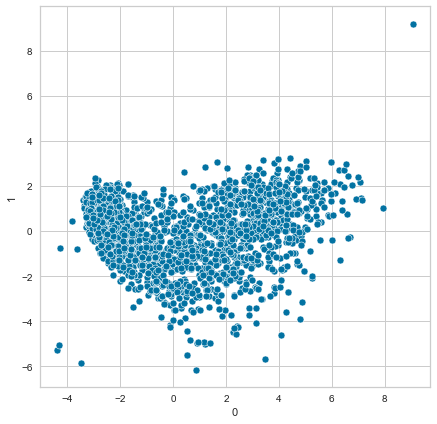

In [75]:
# Scatter plot for two components using the dataframe data_pca
plt.figure(figsize=(7, 7))                                             # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_pca) 

**Applying clustering algorithms on the data generated after applying PCA**

## **K-Means** 

In [76]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

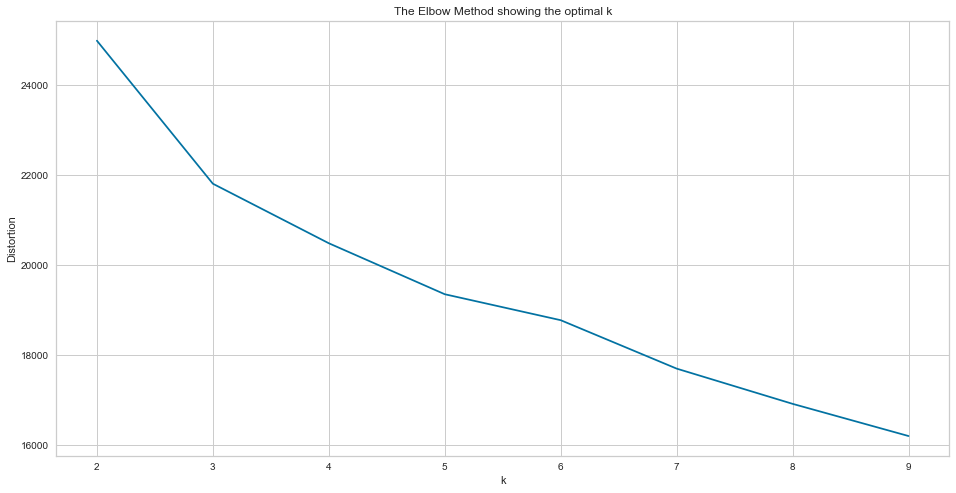

In [77]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**In the above plot, the elbow is seen for K=3 and K=5 as there is some drop in distortion at K=3 and K=5.**

**Use the silhouette score as a metric for different K values to make a better decision about picking the number of clusters(K).**

### **Silhouette score**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

**Finding silhouette score for each value of K**

In [78]:
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:
    
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1).fit(data_pca)
    # Fit and predict on the pca data
    preds = clusterer.predict(data_pca)

    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca, preds)
    # Append silhouette score to empty list created above
    sil_score.append(score)        
    
    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))  


For n_clusters = 3, the silhouette score is 0.2716303411884196)
For n_clusters = 4, the silhouette score is 0.25217341541244137)
For n_clusters = 5, the silhouette score is 0.22067844218155172)
For n_clusters = 6, the silhouette score is 0.12723103531128357)


**From the above silhouette scores, 3 appears to be a good value of K. Build K-Means using K=3.**

### **Applying K-Means on data_pca**

In [79]:
kmeans = KMeans(n_clusters = 3, random_state = 1)  # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(data_pca)                                    # Fitting on the data_pca
kmeans.predict(data_pca)

array([2, 1, 0, ..., 0, 0, 1], dtype=int32)

In [80]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

data["K_means_segments_3"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

In [81]:
# Check the distribution
print(data_pca["K_means_segments_3"].value_counts())
print(data["K_means_segments_3"].value_counts())
print(data_model["K_means_segments_3"].value_counts())

1    1058
0     607
2     562
Name: K_means_segments_3, dtype: int64
1    1058
0     607
2     562
Name: K_means_segments_3, dtype: int64
1    1058
0     607
2     562
Name: K_means_segments_3, dtype: int64


**Visualizing the clusters using PCA**

In [82]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

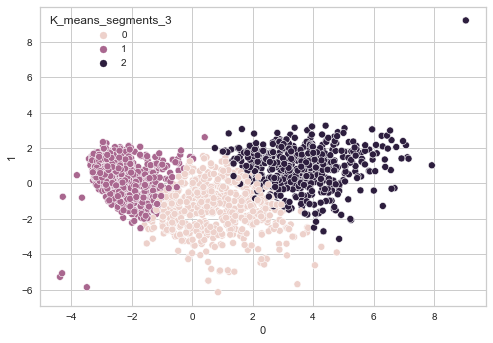

In [83]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

### **Cluster Profiling**

In [84]:
# Taking the cluster-wise mean of all the variables. 
cluster_profile_KMeans_3 = data.groupby('K_means_segments_3').mean()


In [85]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
K_means_segments_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1965.925865,57680.085667,0.281713,0.843493,47.673806,454.586491,23.186161,138.413509,30.570016,24.663921,62.253707,3.782537,6.492586,3.107084,7.883031,5.752883,0.070840,0.125206,0.023064,0.036244,0.014827,0.008237,0.133443,50.074135,1.125206,1.657331,2.782537,733.673806,21.265239,593.739703,0.403624,34.359878
1,1970.975425,35331.837429,0.755198,0.475425,49.260870,45.191871,5.068998,23.705104,7.374291,5.169187,15.291115,2.026465,2.142722,0.572779,3.294896,6.376181,0.068053,0.015123,0.000000,0.000945,0.001890,0.010397,0.084121,45.024575,1.230624,1.652174,2.882798,101.800567,8.036862,500.201323,0.170132,11.321001
2,1968.160142,75902.170819,0.035587,0.206406,50.402135,633.585409,69.914591,461.421708,102.395018,71.357651,78.932384,1.300712,5.215302,6.023132,8.336299,2.889680,0.085409,0.133452,0.263345,0.215302,0.032028,0.007117,0.291815,47.839858,0.241993,1.617438,1.859431,1417.606762,20.875445,549.802491,1.021352,73.430131


**Creating boxplot for each of the variables**

In [86]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

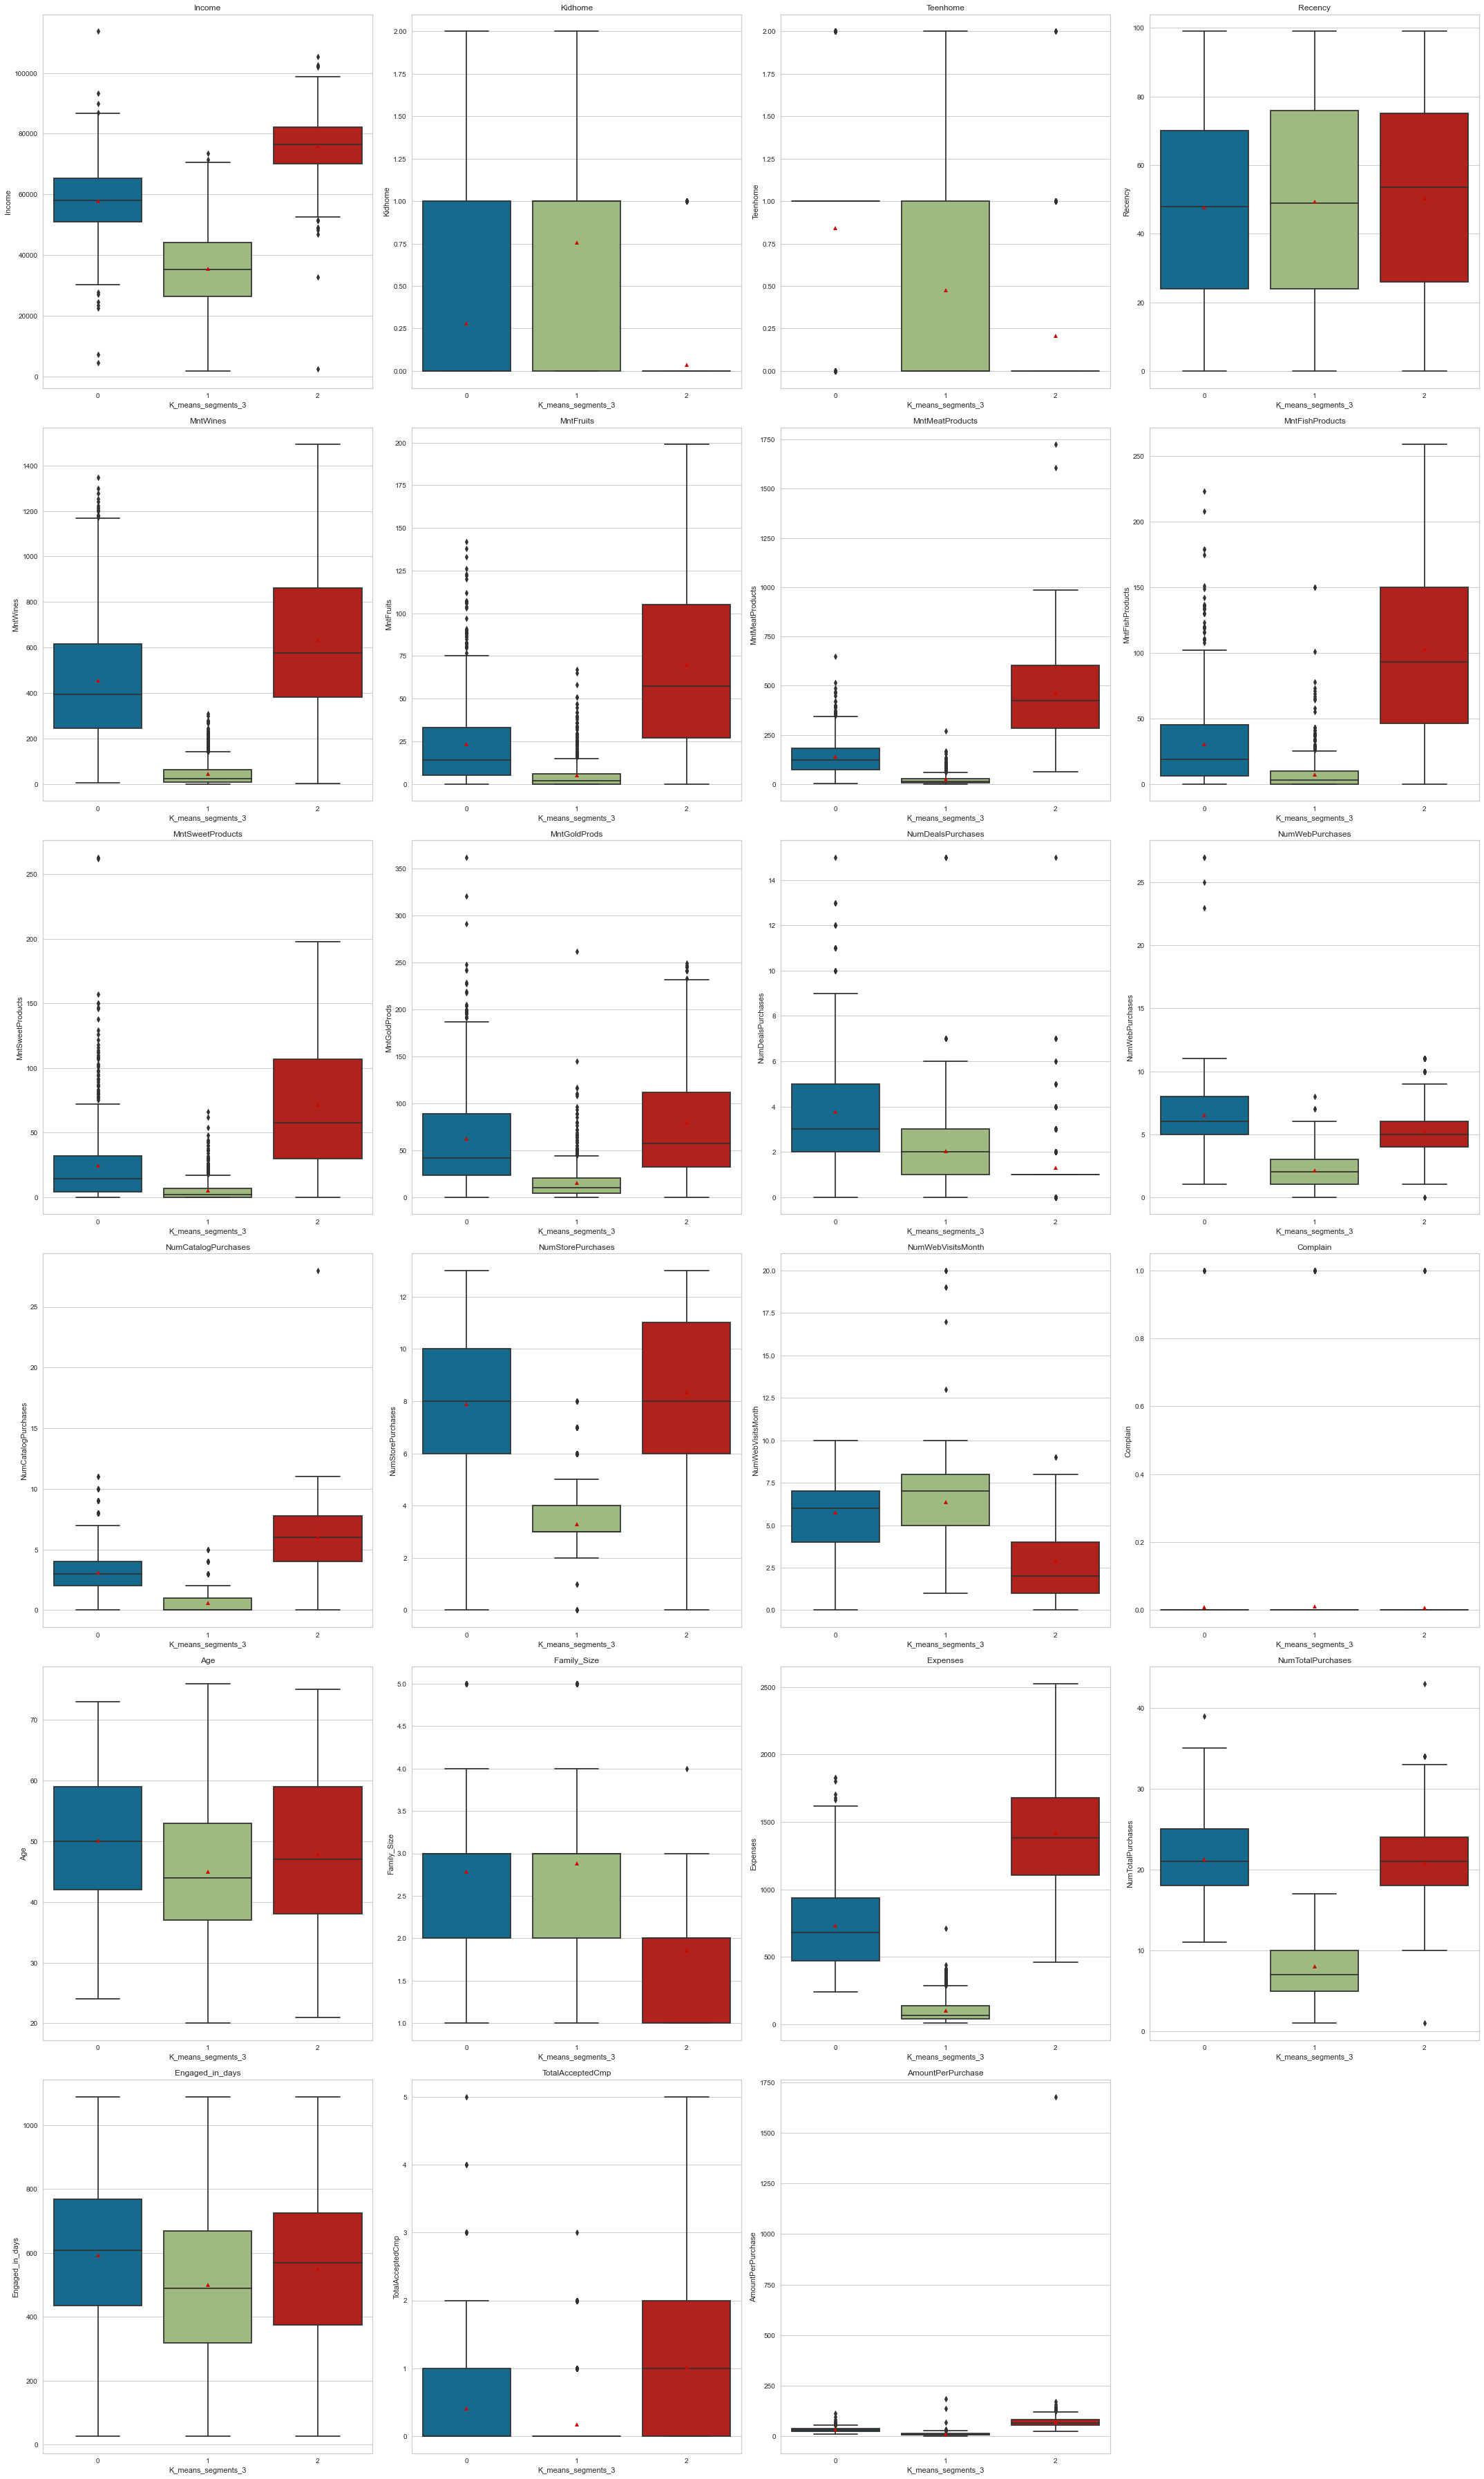

In [87]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_3'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

Above profiles show that K=3 segments the customers into High, Medium and Low-income customers, and not getting deep insights into different types of customers. Build K=5 (which has another elbow in the Elbow curve) and see better cluster profiles.

In [88]:
# Dropping labels gotten from K=3 since PCA data will be used for prediction
# Drop K_means_segments_3. 
data_pca.drop(columns = ["K_means_segments_3"], axis = 1, inplace = True)
data.drop(columns = ["K_means_segments_3"], axis = 1, inplace = True)
data_model.drop(columns = ["K_means_segments_3"], axis = 1, inplace = True)


**Let's build K-Means using K=5**

In [89]:
# Fit the K-Means algorithm using number of cluster as 5 and random_state=0 on data_pca
kmeans = KMeans(n_clusters = 5, random_state = 0)  # Initialize the K-Means algorithm with 5 clusters and random_state=0

kmeans.fit(data_pca)  
kmeans.predict(data_pca)

array([1, 3, 2, ..., 2, 2, 3], dtype=int32)

In [90]:
# Add K-Means cluster labels to data_pca
data_pca["K_means_segments_5"] = kmeans.labels_  
# Add K-Means cluster labels to whole data
data["K_means_segments_5"] = kmeans.labels_  
# Add K-Means cluster labels to data_model
data_model["K_means_segments_5"] = kmeans.labels_  

In [91]:
# Check the distribution
print(data_pca["K_means_segments_5"].value_counts())
print(data["K_means_segments_5"].value_counts())
print(data_model["K_means_segments_5"].value_counts())

3    990
2    401
1    348
0    330
4    158
Name: K_means_segments_5, dtype: int64
3    990
2    401
1    348
0    330
4    158
Name: K_means_segments_5, dtype: int64
3    990
2    401
1    348
0    330
4    158
Name: K_means_segments_5, dtype: int64


**Visualizing the clusters using PCA**

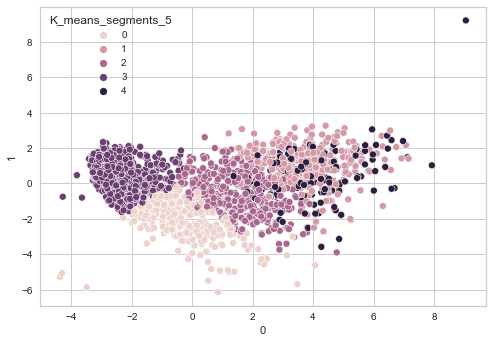

In [92]:
# Using PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "K_means_segments_5")

### **Cluster Profiling**

In [93]:
# Take the cluster-wise mean of all the variables. 
cluster_profile_KMeans_5 = data.groupby('K_means_segments_5').mean()


In [94]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_5.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
K_means_segments_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1966.578788,49125.236364,0.554545,0.860606,48.721212,336.660606,10.703030,91.987879,17.651515,13.057576,53.433333,5.233333,6.051515,2.142424,5.966667,7.187879,0.103030,0.136364,0.003030,0.030303,0.012121,0.006061,0.206061,49.421212,1.415152,1.663636,3.078788,523.493939,19.393939,657.257576,0.490909,26.313403
1,1967.508621,74739.373563,0.020115,0.204023,51.172414,523.074713,82.655172,478.250000,120.695402,81.074713,86.500000,1.356322,4.873563,6.034483,8.341954,2.571839,0.031609,0.031609,0.109195,0.112069,0.000000,0.000000,0.152299,48.491379,0.224138,1.617816,1.841954,1372.250000,20.606322,534.241379,0.436782,69.066125
2,1965.820449,64094.630923,0.109726,0.715711,47.197007,493.064838,35.169576,193.860349,45.104738,35.386534,64.229426,2.366584,6.319202,3.937656,9.044888,4.413965,0.044888,0.074813,0.022444,0.037406,0.002494,0.014963,0.054863,50.179551,0.825436,1.648379,2.473815,866.815461,21.668329,538.506234,0.236908,40.429423
3,1971.235354,34941.218182,0.755556,0.462626,49.328283,39.046465,4.774747,20.687879,6.886869,4.977778,14.246465,1.849495,1.998990,0.519192,3.224242,6.297980,0.061616,0.013131,0.000000,0.001010,0.002020,0.011111,0.077778,44.764646,1.218182,1.651515,2.869697,90.620202,7.591919,490.511111,0.155556,10.821704
4,1969.835443,79338.816456,0.050633,0.196203,48.955696,951.386076,48.120253,464.620253,70.708861,56.341772,67.917722,1.215190,5.905063,6.183544,8.006329,3.734177,0.246835,0.430380,0.721519,0.500000,0.139241,0.006329,0.721519,46.164557,0.246835,1.613924,1.860759,1659.094937,21.310127,596.481013,2.759494,91.504296


**Plot boxplot**

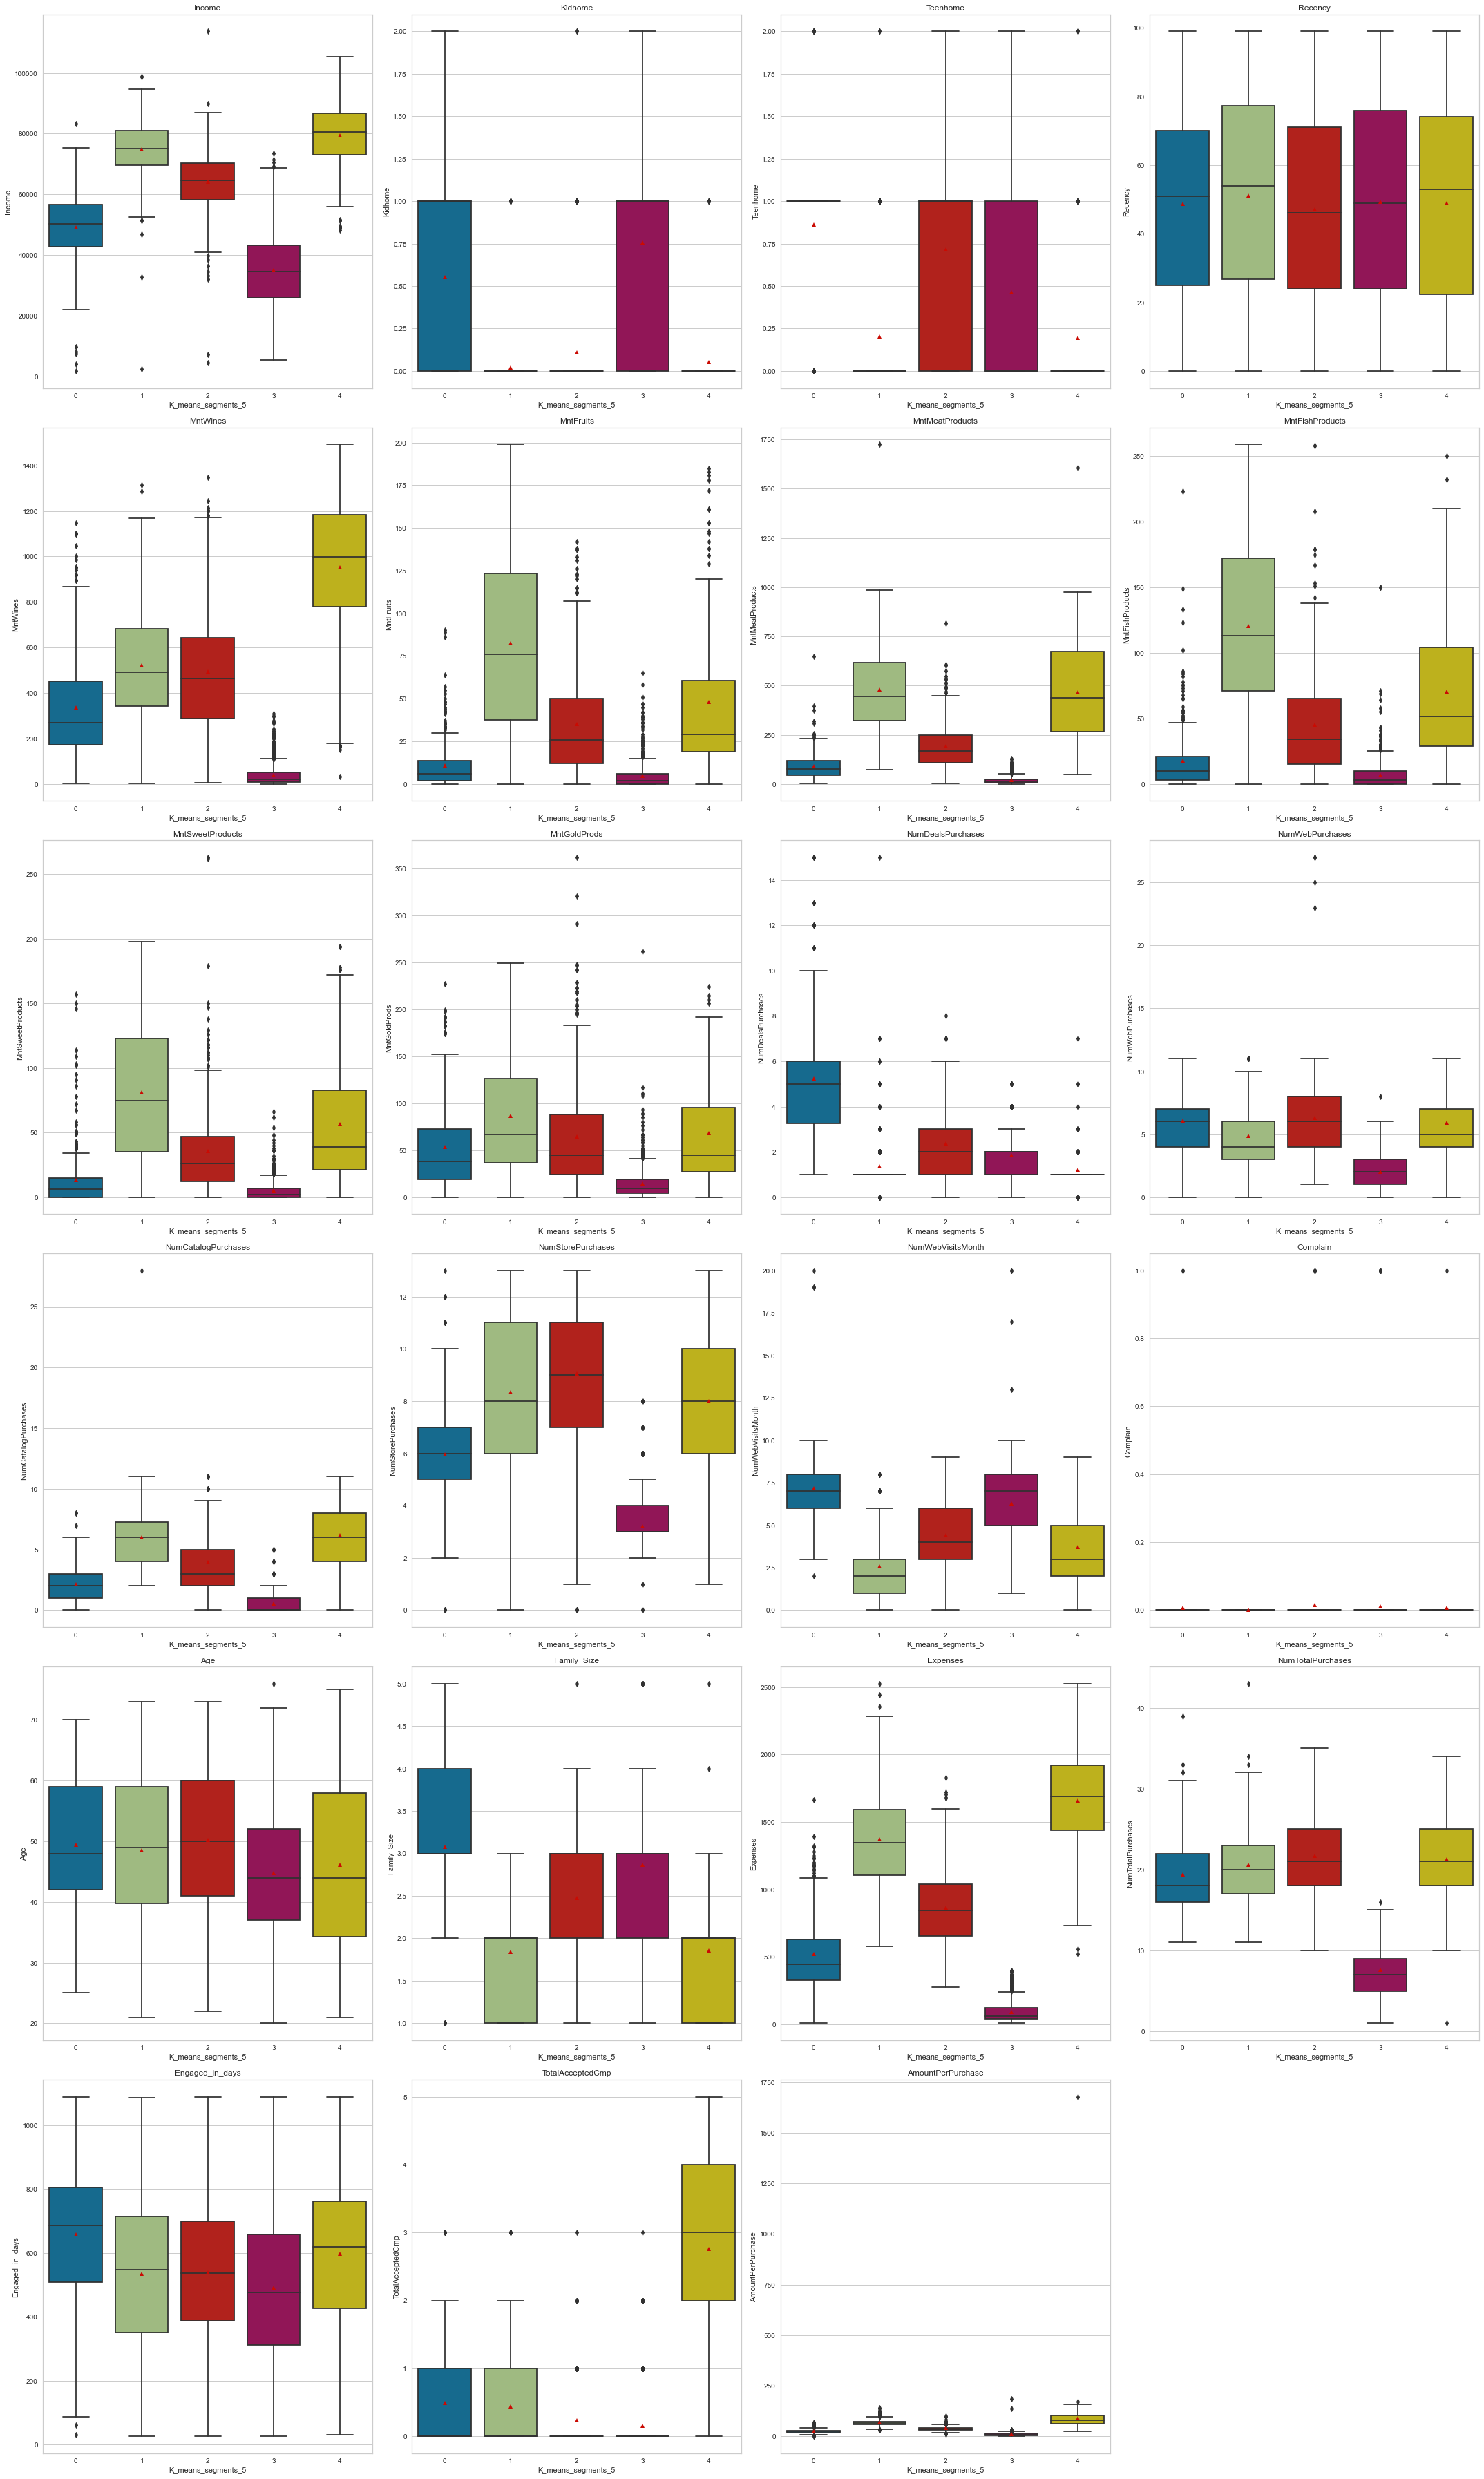

In [95]:
# Create boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

In [96]:
# Dropping labels we got from K-Means since PCA data will be used for prediction

data_pca.drop(columns = ["K_means_segments_5"], axis = 1, inplace = True)
data.drop(columns = ["K_means_segments_5"], axis = 1, inplace = True)
data_model.drop(columns = ["K_means_segments_5"], axis = 1, inplace = True)

From the above profiles, K=5 provides more interesting insights about customer's purchasing behavior and preferred channels for purchasing products. We can also see that the High, Medium and Low income groups have different age groups and preferences, which was not evident in K=3. So, choose K=5.

## **K-Medoids**

**Silhouette score for K=5 in K-Medoids**

In [97]:
kmedo = KMedoids(n_clusters = 5, random_state = 1) # Initializing K-Medoids with number of clusters as 5 and random_state=1

preds = kmedo.fit_predict(data_pca)           # Fit and predict K-Medoids using data_pca

score = silhouette_score(data_pca, preds)           # Calculate the silhouette score

print(score)                   # Print the score

 

0.10752806959273029


**Observations and Insights:**

In [98]:
kmedo = KMedoids(n_clusters = 5, random_state = 1)

kmedo.fit(data_pca)

# Predicting on data_pca and adding K-Medoids cluster labels to the whole data
data['kmedoLabels'] = kmedo.predict(data_pca)

# Predicting on data_pca and adding K-Medoids cluster labels to data_model
data_model['kmedoLabels'] = kmedo.predict(data_pca)

# Predicting on data_pca and adding K-Medoids cluster labels to data_pca
data_pca['kmedoLabels'] = kmedo.predict(data_pca)


In [99]:
# Let's check the distribution
print(data["kmedoLabels"].value_counts())
print(data_model["kmedoLabels"].value_counts())
print(data_pca["kmedoLabels"].value_counts())


3    631
1    578
0    480
2    276
4    262
Name: kmedoLabels, dtype: int64
3    631
1    578
0    480
2    276
4    262
Name: kmedoLabels, dtype: int64
3    631
1    578
0    480
2    276
4    262
Name: kmedoLabels, dtype: int64


**Visualizing the clusters using PCA**

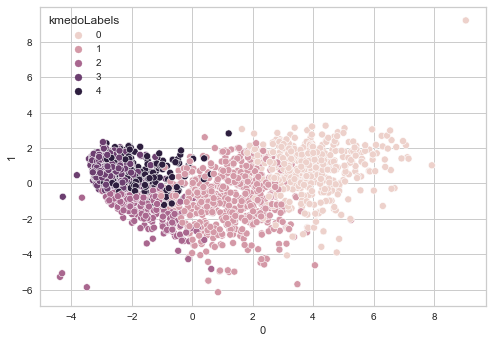

In [100]:
# Using PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "kmedoLabels")

### **Cluster Profiling**

In [101]:
# Take the cluster-wise mean of all the variables. 
cluster_profile_KMedoids_5 = data.groupby('kmedoLabels').mean()


In [102]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_KMedoids_5.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
kmedoLabels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1968.620833,76228.550000,0.043750,0.220833,50.693750,657.135417,75.320833,479.906250,109.112500,79.768750,82.891667,1.389583,5.497917,5.904167,8.560417,3.087500,0.089583,0.131250,0.283333,0.231250,0.029167,0.004167,0.325000,47.379167,0.264583,1.608333,1.872917,1484.135417,21.352083,567.108333,1.089583,75.798176
1,1965.595156,61872.202422,0.174740,0.737024,46.278547,499.551903,27.456747,179.974048,37.503460,27.005190,63.493080,3.114187,6.150519,3.896194,8.242215,4.875433,0.070934,0.133218,0.043253,0.044983,0.020761,0.010381,0.110727,50.404844,0.911765,1.662630,2.574394,834.984429,21.403114,565.323529,0.423875,39.973157
2,1969.721014,38367.039855,0.782609,0.652174,46.083333,133.579710,8.050725,55.445652,13.050725,7.931159,36.826087,4.268116,4.268116,1.184783,4.195652,7.746377,0.065217,0.047101,0.000000,0.018116,0.003623,0.014493,0.221014,46.278986,1.434783,1.597826,3.032609,254.884058,13.916667,711.858696,0.355072,18.235851
3,1972.343899,33036.182250,0.801902,0.416799,39.255151,24.375594,3.473851,14.274168,5.187005,3.467512,10.407290,1.565769,1.657686,0.316957,2.896989,6.543582,0.083994,0.004754,0.000000,0.000000,0.003170,0.012678,0.083994,43.656101,1.218700,1.646593,2.865293,61.185420,6.437401,475.879556,0.175911,8.746105
4,1967.446565,42988.339695,0.557252,0.595420,79.431298,89.339695,8.744275,37.122137,11.366412,8.656489,19.496183,2.053435,2.751908,1.007634,4.187023,4.942748,0.030534,0.041985,0.003817,0.007634,0.000000,0.000000,0.000000,48.553435,1.152672,1.717557,2.870229,174.725191,10.000000,392.671756,0.083969,15.504972


**Plot boxplot**

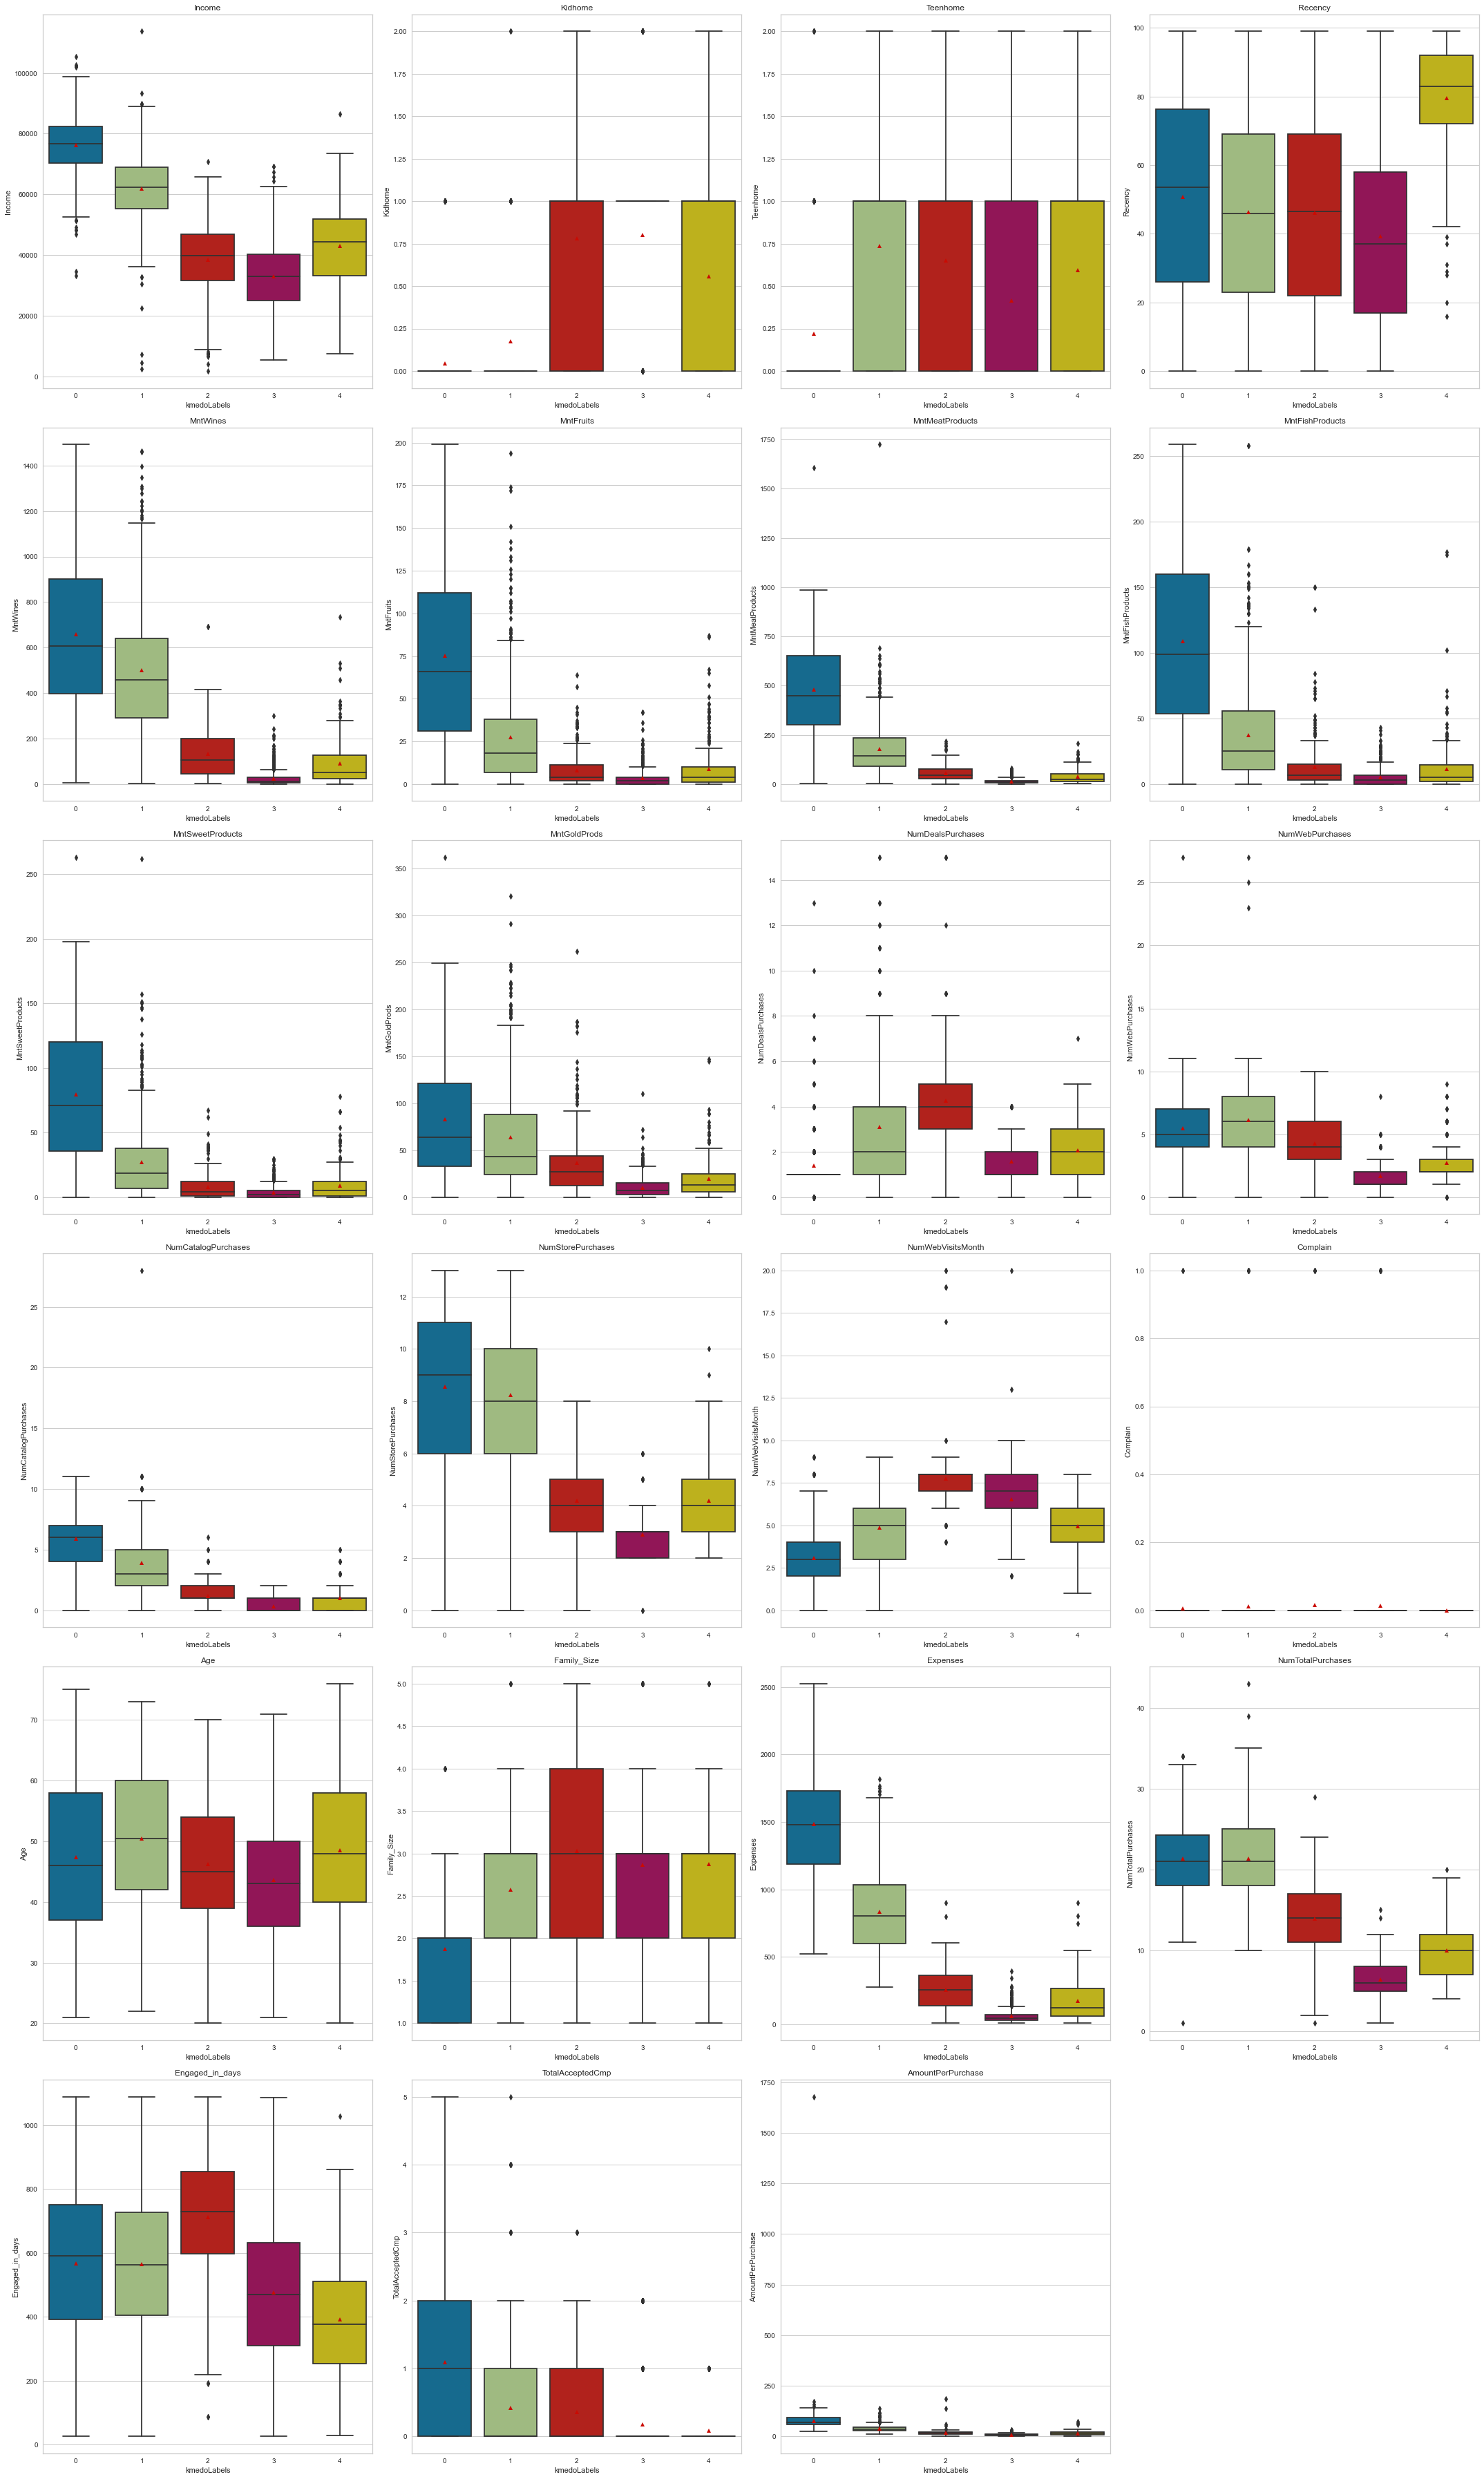

In [103]:
# Create boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['kmedoLabels'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

In [104]:
# Dropping labels gotten from K-Medoids since PCA data will be used for prediction

data_pca.drop(columns = ["kmedoLabels"], axis = 1, inplace = True)
data.drop(columns = ["kmedoLabels"], axis = 1, inplace = True)
data_model.drop(columns = ["kmedoLabels"], axis = 1, inplace = True)

## **Hierarchical Clustering**

Find the Cophenetic correlation for different distances with different linkage methods.

### **Cophenetic correlation**

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. 

**Calculating Cophenetic correlation for each of the distance metrics with each of the linkage methods**

In [105]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.8063217204308334.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6171288089817472.
Cophenetic correlation for Euclidean distance and average linkage is 0.8619040295688458.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7884037056391845.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.701400935083475.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8121282710675837.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6367397874708013.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.47109715012277276.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6670294776111134.
Cophenetic correlation for Cityblock distance and single linkage is 0.8090687047884543.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7963434052019072.
Cophenetic corr

In [106]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8671371105092283, which is obtained with Cityblock distance and average linkage.


**Dendrograms for different linkages with `Cityblock distance`**

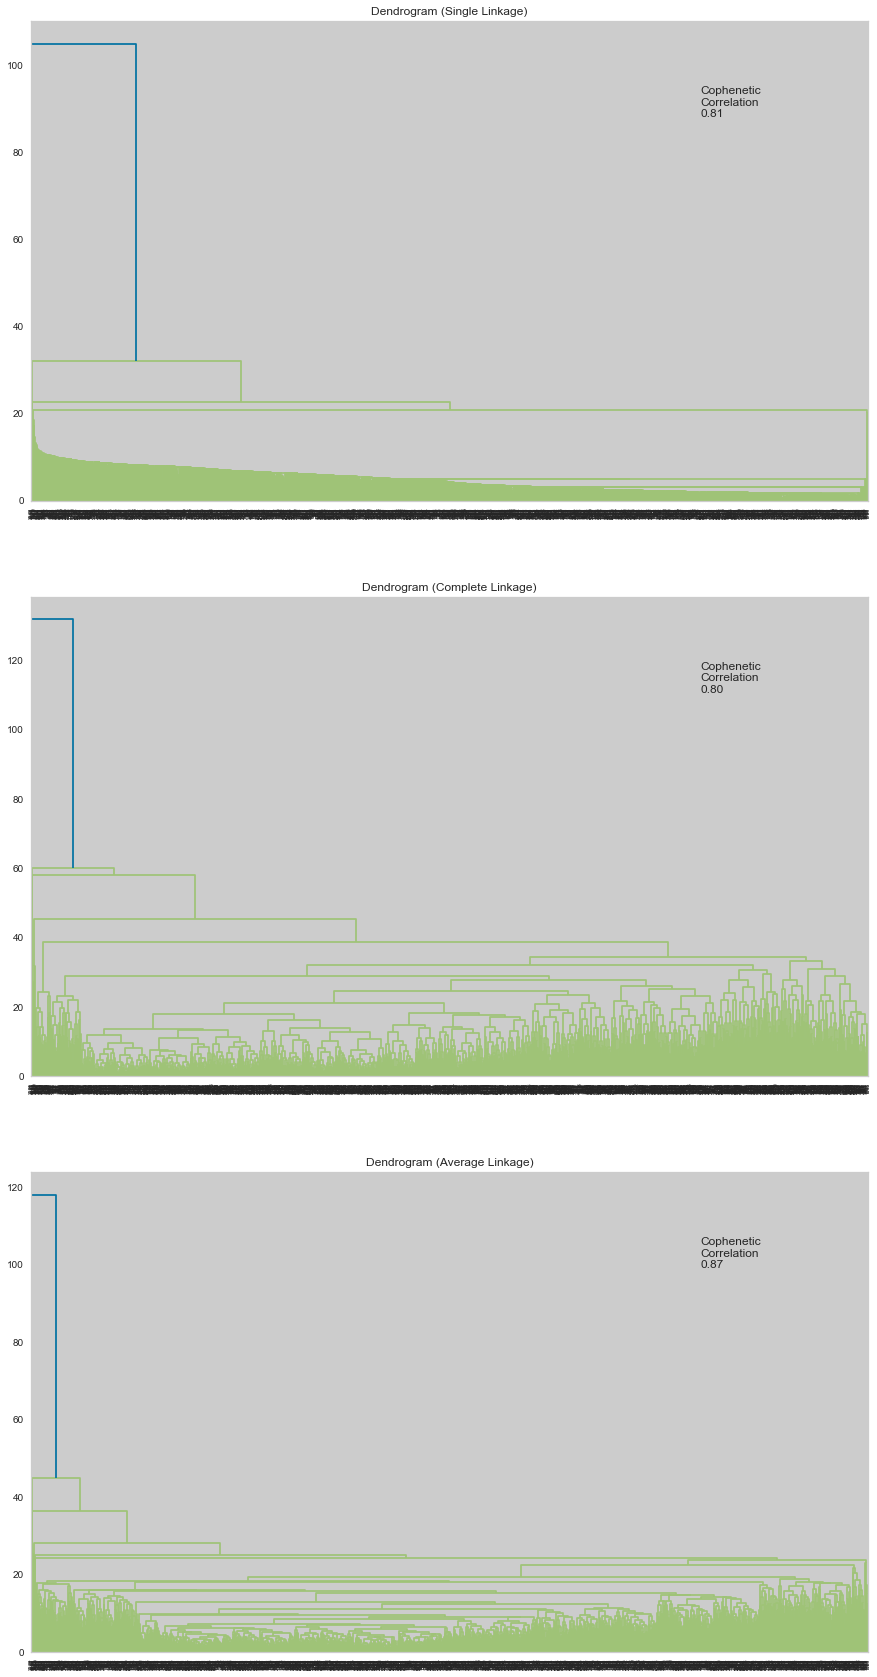

In [107]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# Enumerate through the list of linkage methods above
# For each linkage method, plotting the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Dendrograms for different linkages with `Chebyshev distance`**

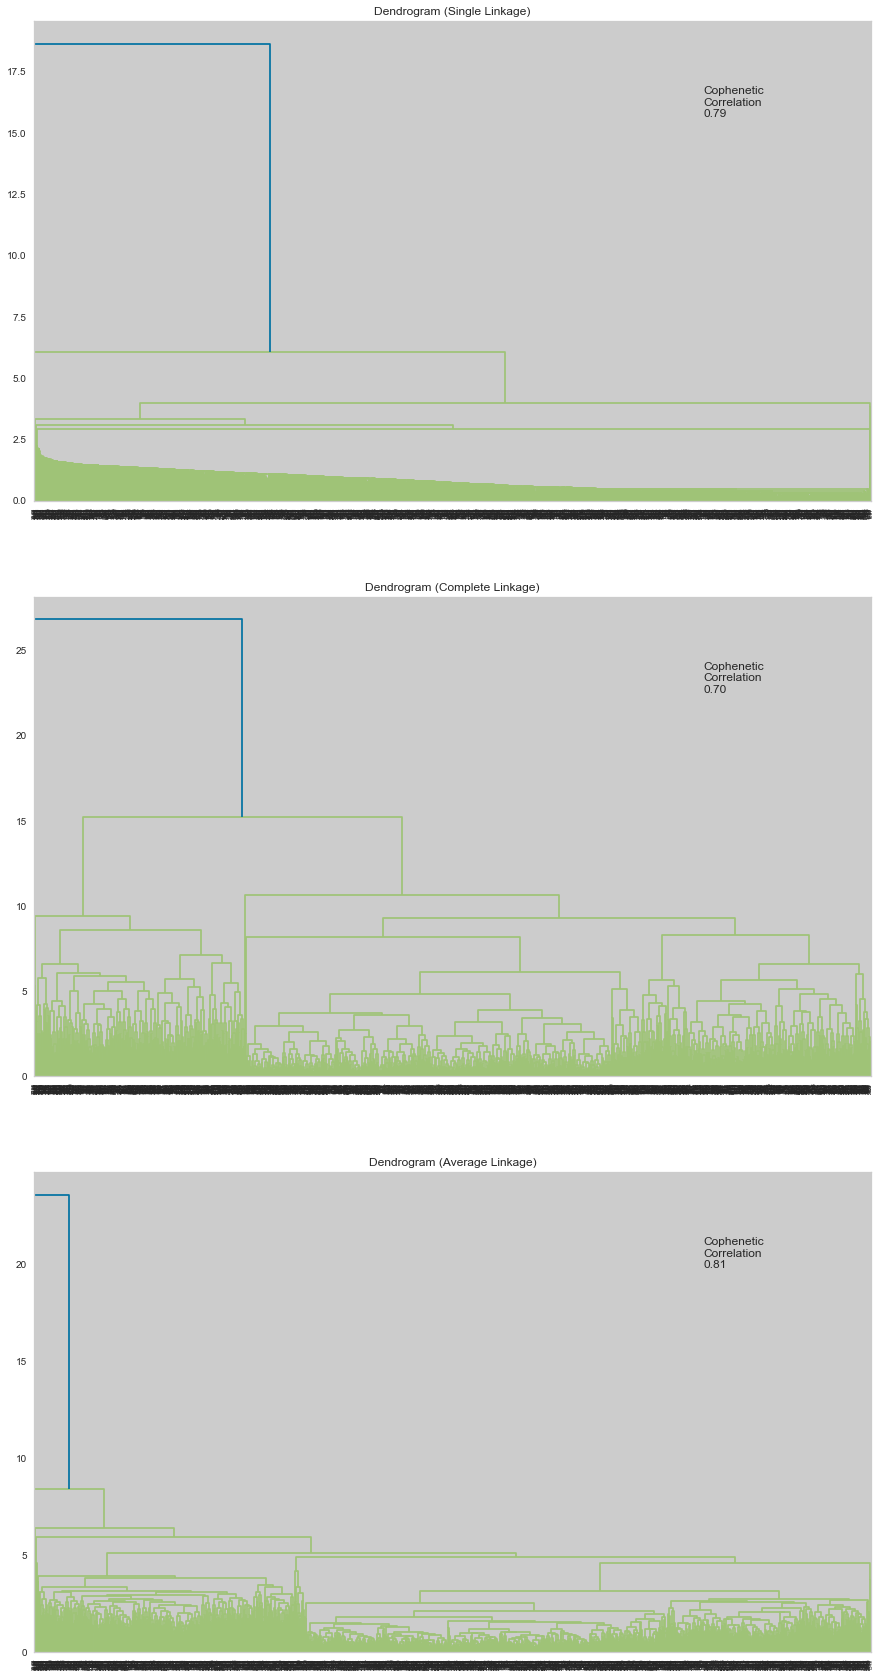

In [108]:
# Plot the dendrogram for Chebyshev distance with linkages single, complete and average. 
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# Enumerate through the list of linkage methods above
# For each linkage method, plotting the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Chebyshev", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**

**Dendrograms for different linkages with Mahalanobis distance**

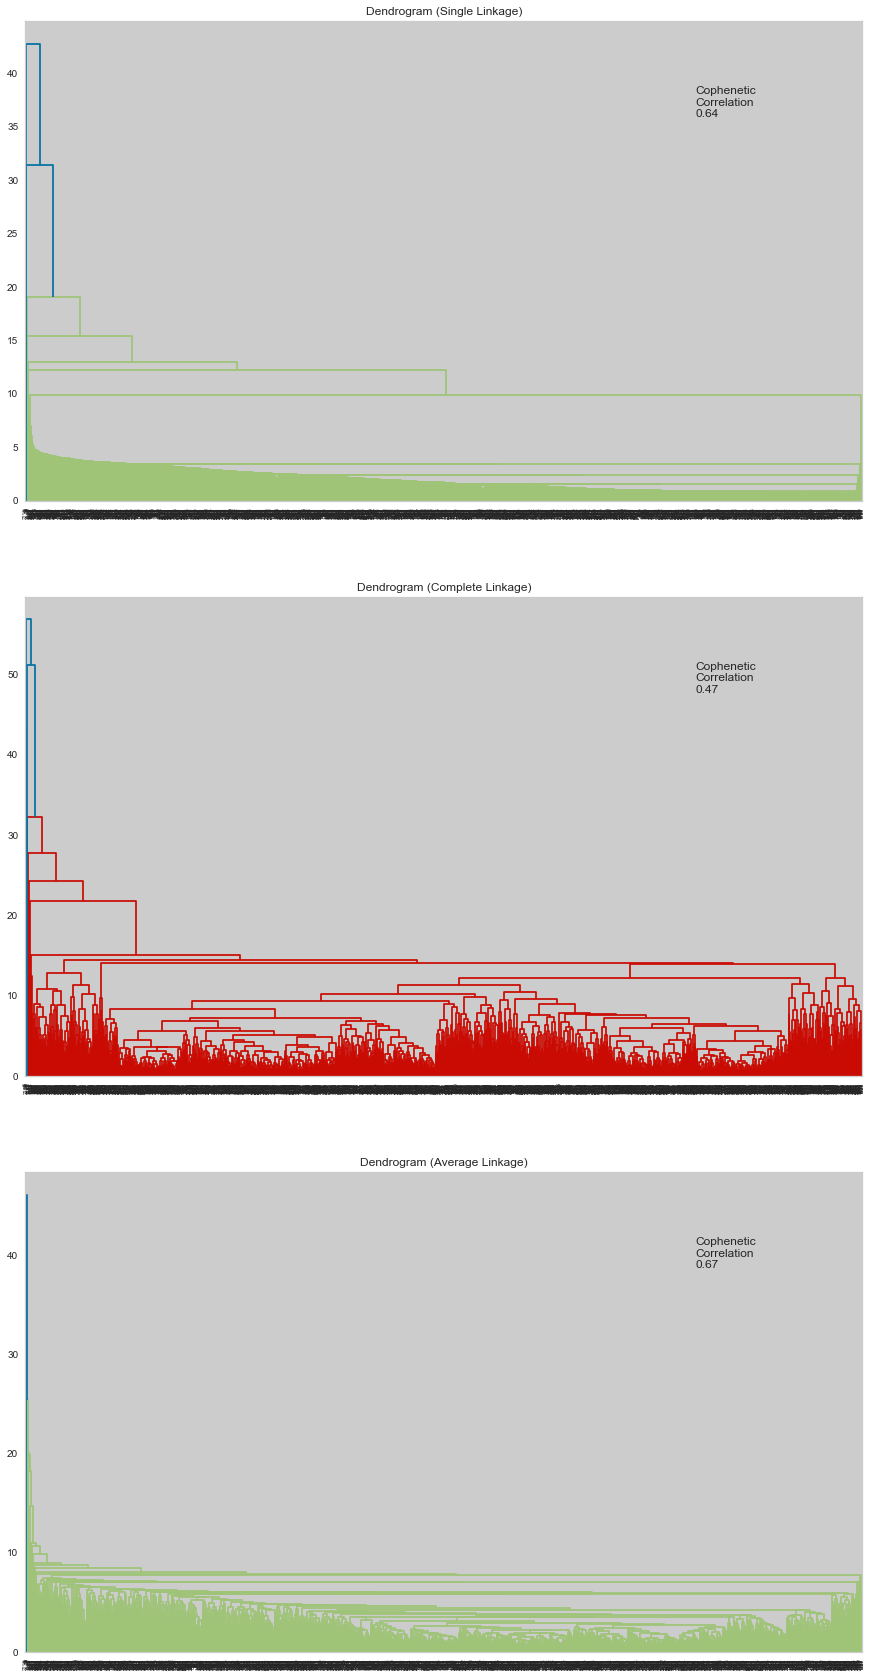

In [109]:
# Plotting the dendrogram for Mahalanobis distance with linkages single, complete and average. 
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# Enumerate through the list of linkage methods above
# For each linkage method, plotting the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Mahalanobis", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Dendrograms for different linkages with Euclidean distance**

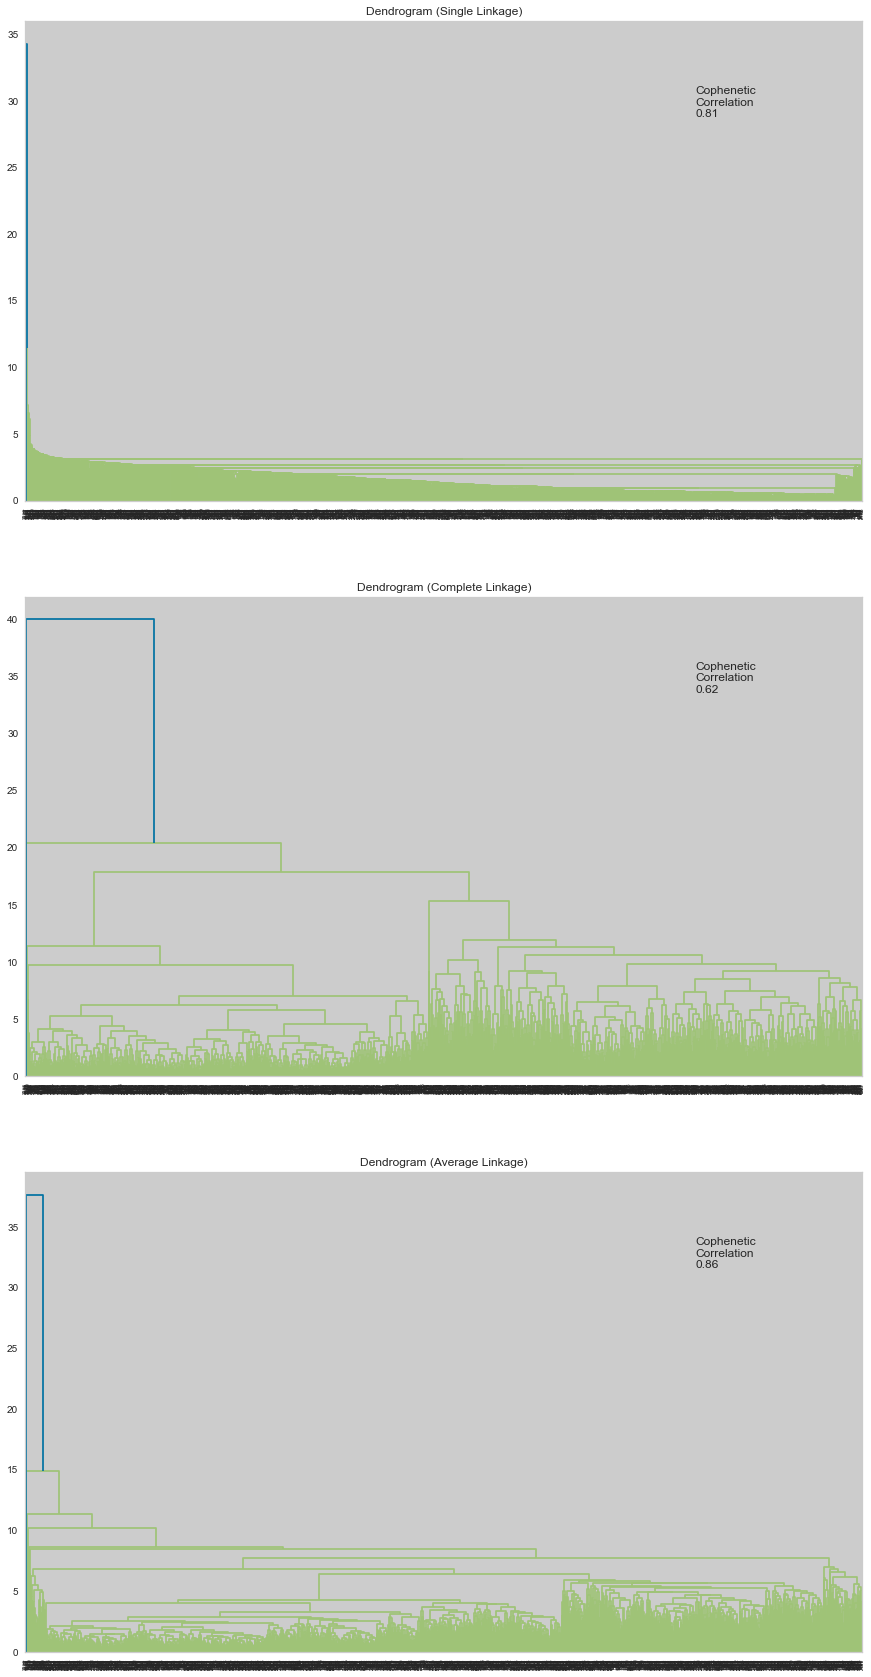

In [110]:
# Plotting the dendrogram for Euclidean distance with linkages single, complete, average and ward. 
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# Enumerate through the list of linkage methods above
# For each linkage method, plotting the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Euclidean", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [111]:
# Initialize Agglomerative Clustering with affinity (distance) as Euclidean, linkage as 'Ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='ward',) 

# Fit on data_pca
HCmodel.fit(data_pca)



AgglomerativeClustering(n_clusters=3)

In [112]:
# Add Agglomerative Clustering cluster labels to data_pca
data_pca['HCLabels'] = HCmodel.labels_

# Add Agglomerative Clustering cluster labels to the whole data
data['HCLabels'] = HCmodel.labels_

# Add Agglomerative Clustering cluster labels to data_model
data_model['HCLabels'] = HCmodel.labels_




In [113]:
# Checking the distribution
print(data_pca.HCLabels.value_counts())
print(data_model.HCLabels.value_counts())
print(data.HCLabels.value_counts())


1    1072
0     583
2     572
Name: HCLabels, dtype: int64
1    1072
0     583
2     572
Name: HCLabels, dtype: int64
1    1072
0     583
2     572
Name: HCLabels, dtype: int64


**Visualizing the clusters using PCA.**

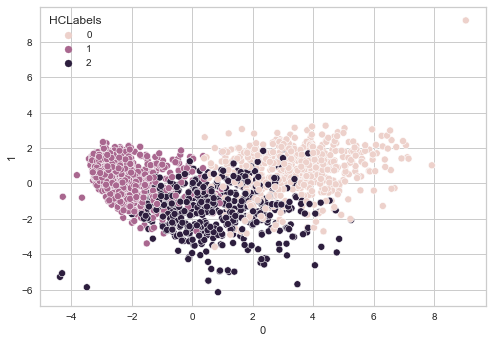

In [114]:
# Using PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "HCLabels")

### **Cluster Profiling**

In [115]:
# Taking the cluster-wise mean of all the variables. 
cluster_profile_HC_3 = data.groupby('HCLabels').mean()


In [116]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_HC_3.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
HCLabels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1967.840480,74435.612350,0.029160,0.238422,51.413379,615.029160,65.641509,436.615780,96.176672,69.054889,80.161235,1.425386,5.404803,5.732419,8.102916,2.960549,0.089194,0.137221,0.259005,0.216123,0.034305,0.003431,0.288165,48.159520,0.267581,1.602058,1.869640,1362.679245,20.665523,556.689537,1.024014,71.114277
1,1971.041045,35708.220149,0.739739,0.475746,49.695896,47.899254,6.098881,25.866604,9.053172,6.685634,17.035448,1.971082,2.223881,0.634328,3.388060,6.302239,0.067164,0.012127,0.000000,0.000000,0.001866,0.010261,0.083955,44.958955,1.215485,1.646455,2.861940,112.638993,8.217351,507.765858,0.165112,11.807554
2,1965.923077,58347.451049,0.314685,0.842657,45.688811,471.874126,24.339161,150.594406,31.692308,22.931818,58.269231,3.893357,6.300699,3.243007,8.041958,5.909091,0.068182,0.129371,0.019231,0.031469,0.012238,0.012238,0.132867,50.076923,1.157343,1.685315,2.842657,759.701049,21.479021,576.445804,0.393357,34.937898


**Plot boxplot**

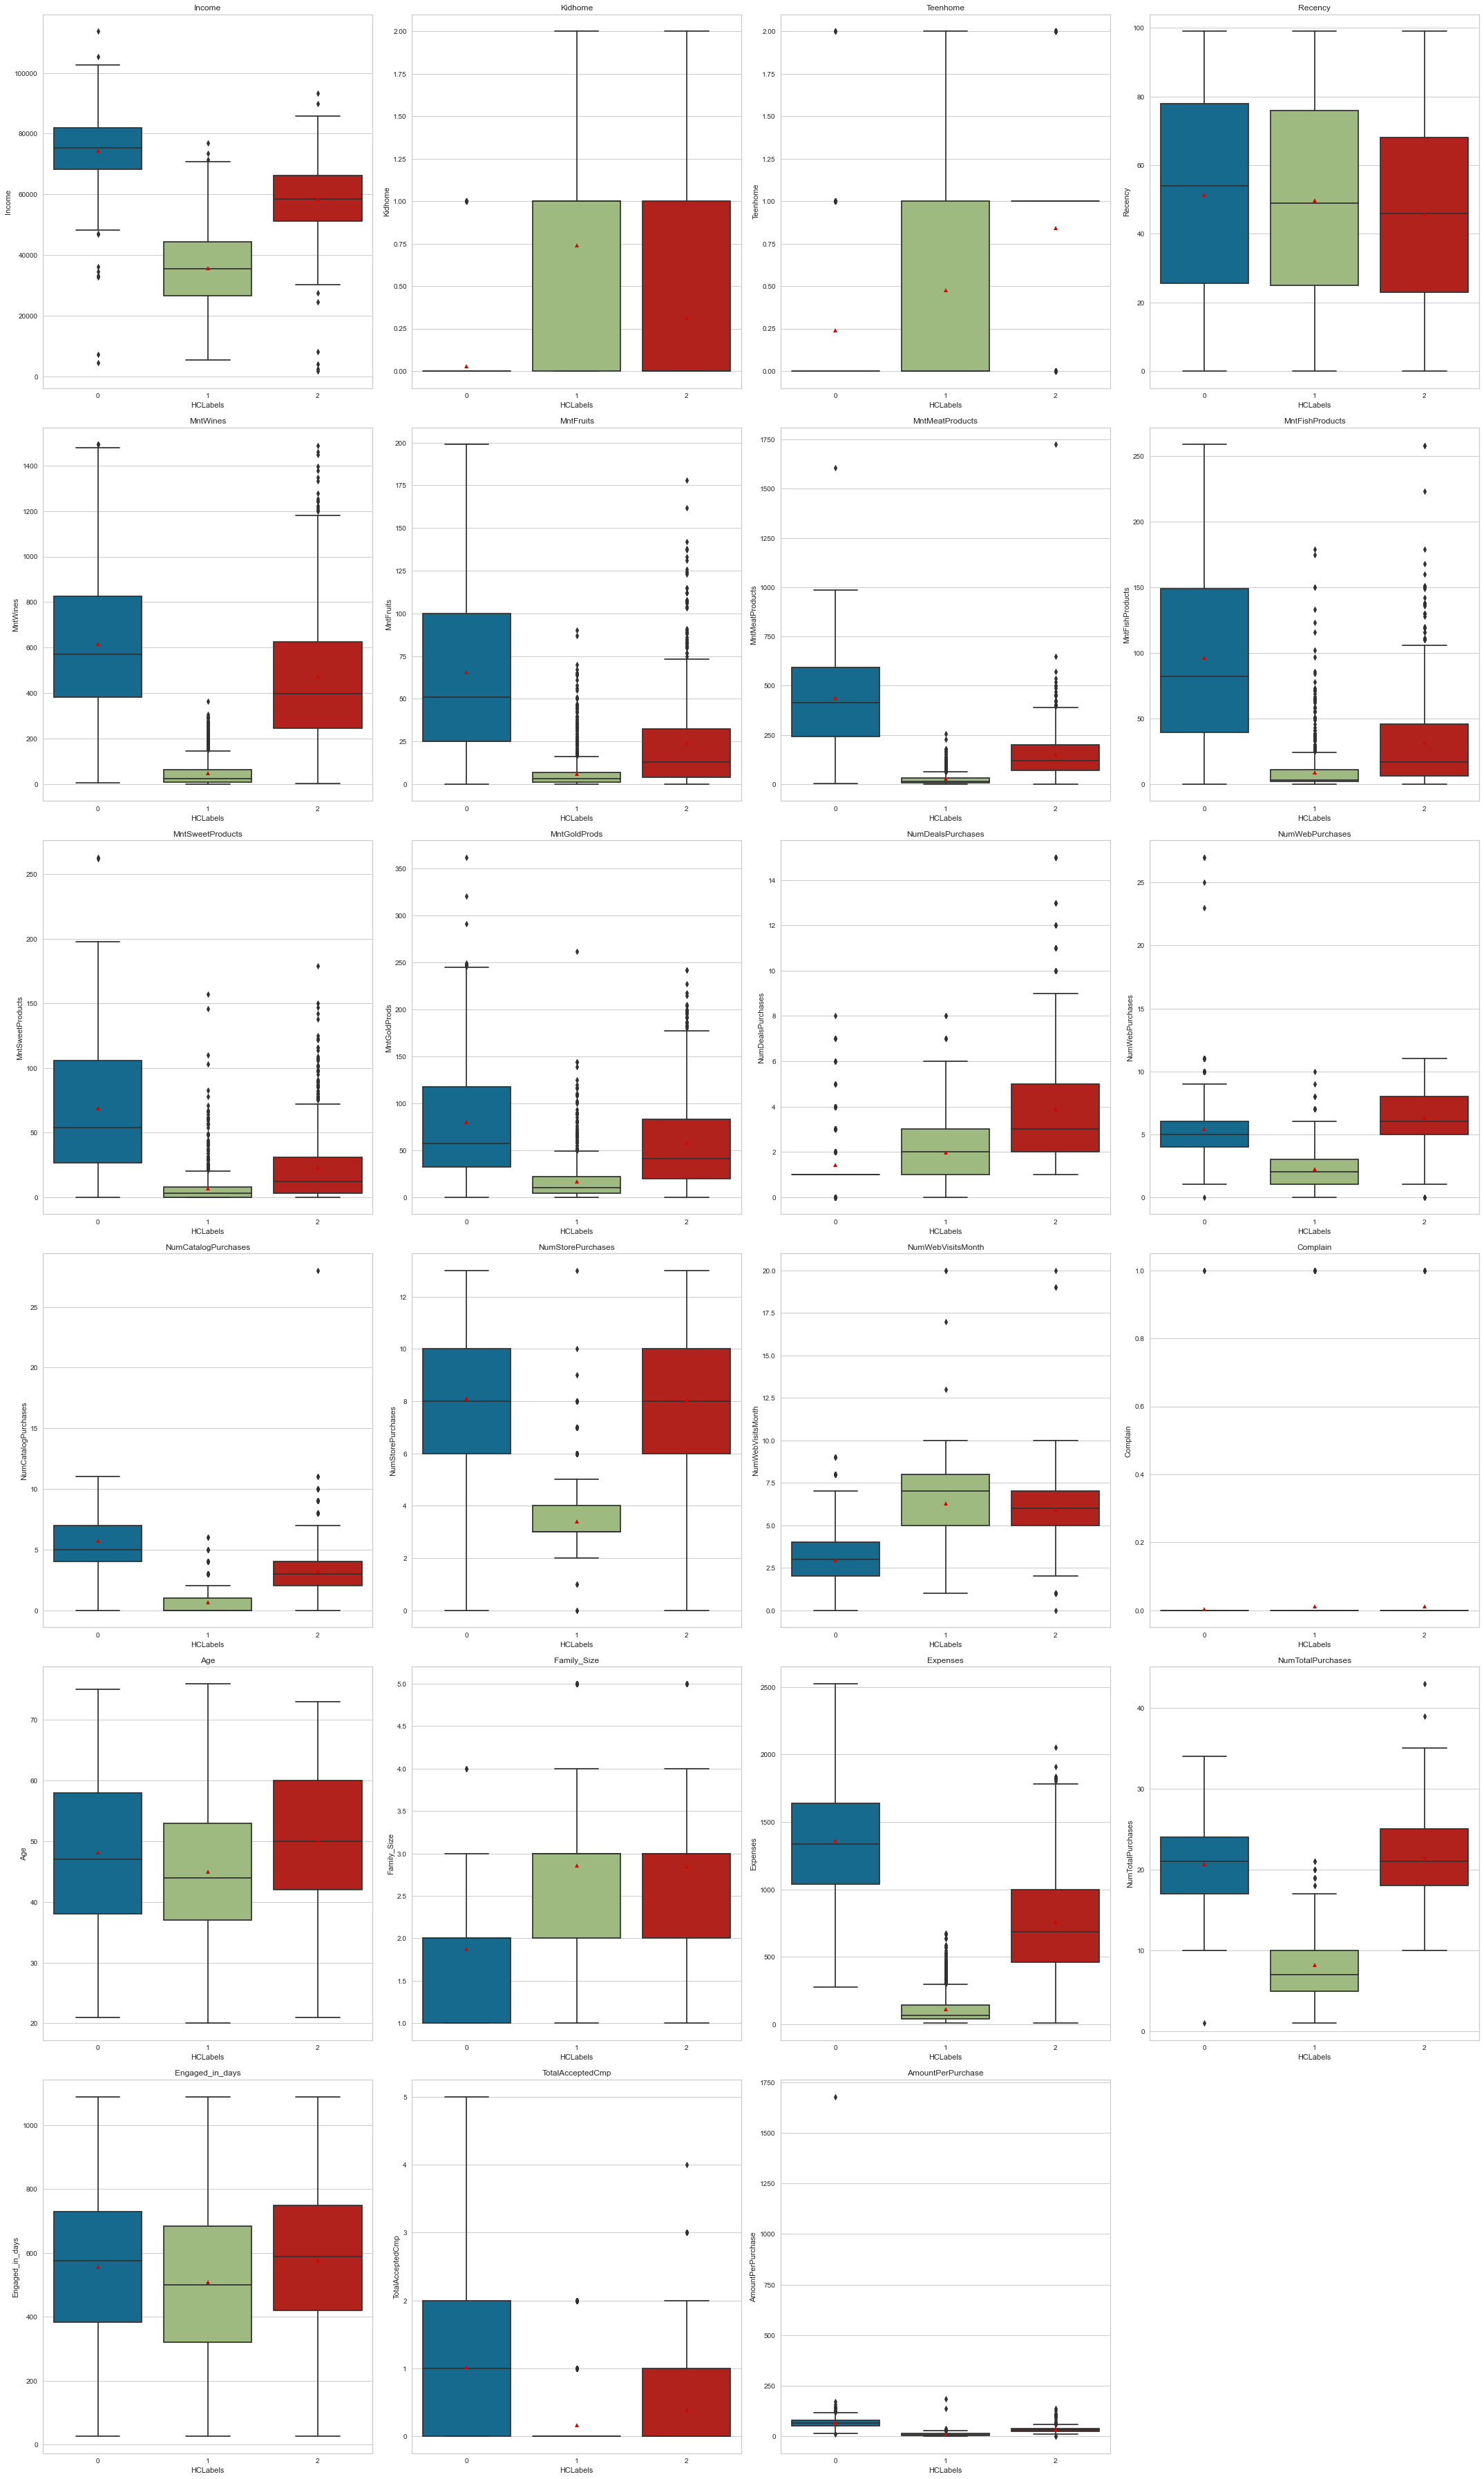

In [117]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['HCLabels'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

In [118]:
# Dropping labels gotten from Agglomerative Clustering since PCA data will be used for prediction

data_pca.drop(columns = ["HCLabels"], axis = 1, inplace = True)
data.drop(columns = ["HCLabels"], axis = 1, inplace = True)
data_model.drop(columns = ["HCLabels"], axis = 1, inplace = True)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [119]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [120]:
from sklearn.cluster import DBSCAN

# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.19914069883261887
For eps value =2 For min sample =20 The average silhoutte_score is : 0.33891446622349564
For eps value =3 For min sample =6 The average silhoutte_score is : 0.3363169240280882
For eps value =3 For min sample =20 The average silhoutte_score is : 0.3398851568849851


In [121]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


**Applying DBSCAN using the hyperparameter values gotten above.**

In [122]:
# Apply DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps = 3, min_samples = 20)


In [123]:
# fit_predict on data_pca and add DBSCAN cluster labels to the whole data
data['DBSLabels'] = dbs.fit_predict(data_pca)

# fit_predict on data_pca and add DBSCAN cluster labels to data_model
data_model['DBSLabels'] = dbs.fit_predict(data_pca)

# fit_predict on data_pca and add DBSCAN cluster labels to data_pca
data_pca['DBSLabels'] = dbs.fit_predict(data_pca)


In [124]:
# Checking the distribution
print(data["DBSLabels"].value_counts())
print(data_model["DBSLabels"].value_counts())
print(data_pca["DBSLabels"].value_counts())

 0    1905
-1     322
Name: DBSLabels, dtype: int64
 0    1905
-1     322
Name: DBSLabels, dtype: int64
 0    1905
-1     322
Name: DBSLabels, dtype: int64


**Visualizing the clusters using PCA.**

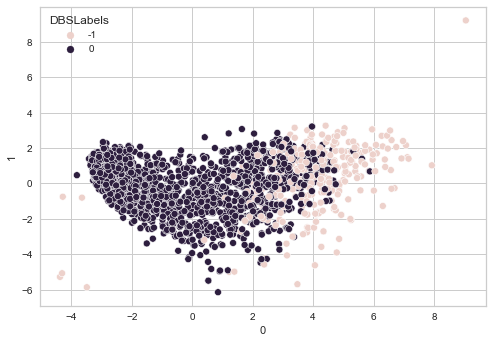

In [125]:
# Using PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "DBSLabels")

In [126]:
# Dropping labels gotten from DBSCAN since PCA data will be used for prediction

data_pca.drop(columns = ["DBSLabels"], axis = 1, inplace = True)
data.drop(columns = ["DBSLabels"], axis = 1, inplace = True)
data_model.drop(columns = ["DBSLabels"], axis = 1, inplace = True)

## **Gaussian Mixture Model**

**Finding the silhouette score for K=5 in Gaussian Mixture**

In [127]:
gmm = GaussianMixture(n_components = 5, random_state = 1) # Initialize Gaussian Mixture Model with number of clusters as 5 and random_state=1

preds = gmm.fit_predict(data_pca) # Fit and predict Gaussian Mixture Model using data_pca

score = silhouette_score(data_pca, preds)           # Calculate the silhouette score

print(score)                   # Print the score



0.14344403792721092


In [128]:
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to the whole data
data['GmmLabels'] = gmm.fit_predict(data_pca)

# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_model
data_model['GmmLabels'] = gmm.fit_predict(data_pca)

# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_pca
data_pca['GmmLabels'] = gmm.fit_predict(data_pca)


In [129]:
# Checking the distribution
data.GmmLabels.value_counts()


1    756
4    594
0    446
3    347
2     84
Name: GmmLabels, dtype: int64

**Visualizing the clusters using PCA.**

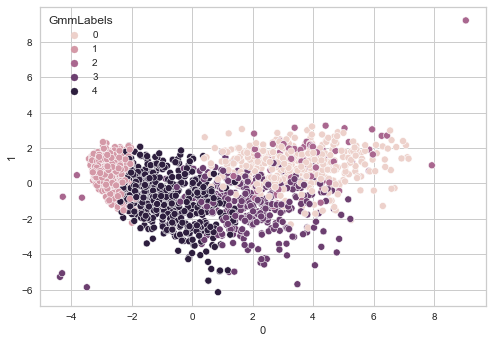

In [130]:
# Using PCA_PLOT function created above
PCA_PLOT(0, 1, data_pca, "GmmLabels")

### **Cluster Profiling**

In [131]:
# Taking the cluster-wise mean of all the variables. 
cluster_profile_GMM_5 = data.groupby('GmmLabels').mean()


In [132]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_GMM_5.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
GmmLabels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1967.556054,75558.802691,0.022422,0.204036,51.621076,595.811659,67.056054,460.273543,101.219731,67.802691,76.340807,1.226457,5.168161,5.865471,8.230942,2.486547,0.065022,0.096413,0.219731,0.181614,0.008969,0.004484,0.221973,48.443946,0.226457,1.647982,1.874439,1368.504484,20.491031,520.143498,0.793722,67.444900
1,1972.055556,32101.753968,0.851852,0.443122,48.191799,20.048942,3.068783,12.875661,4.702381,3.287037,10.215608,1.767196,1.632275,0.313492,2.884921,6.403439,0.071429,0.003968,0.000000,0.000000,0.002646,0.013228,0.076720,43.944444,1.294974,1.648148,2.943122,54.198413,6.597884,485.312169,0.154762,7.956939
2,1969.559524,74291.583333,0.130952,0.261905,47.642857,839.440476,59.297619,490.607143,81.392857,57.976190,79.250000,1.238095,3.892857,4.630952,5.630952,4.547619,0.130952,0.345238,0.511905,0.333333,0.119048,0.000000,0.523810,46.440476,0.392857,1.571429,1.964286,1607.964286,15.392857,613.000000,1.964286,123.058593
3,1966.674352,62087.201729,0.170029,0.703170,45.161383,553.299712,42.570605,199.815562,55.374640,47.423631,77.677233,3.340058,6.711816,4.622478,9.253602,5.579251,0.112392,0.123919,0.057637,0.074928,0.031700,0.014409,0.184438,49.325648,0.873199,1.616715,2.489914,976.161383,23.927954,628.948127,0.585014,40.879158
4,1967.057239,49321.569024,0.447811,0.739057,50.930976,229.671717,11.361953,72.143098,15.409091,10.929293,38.626263,3.409091,4.956229,1.735690,5.757576,6.050505,0.050505,0.082492,0.001684,0.015152,0.003367,0.005051,0.116162,48.942761,1.186869,1.664983,2.851852,378.141414,15.858586,555.530303,0.269360,22.700233


**Plot boxplot**

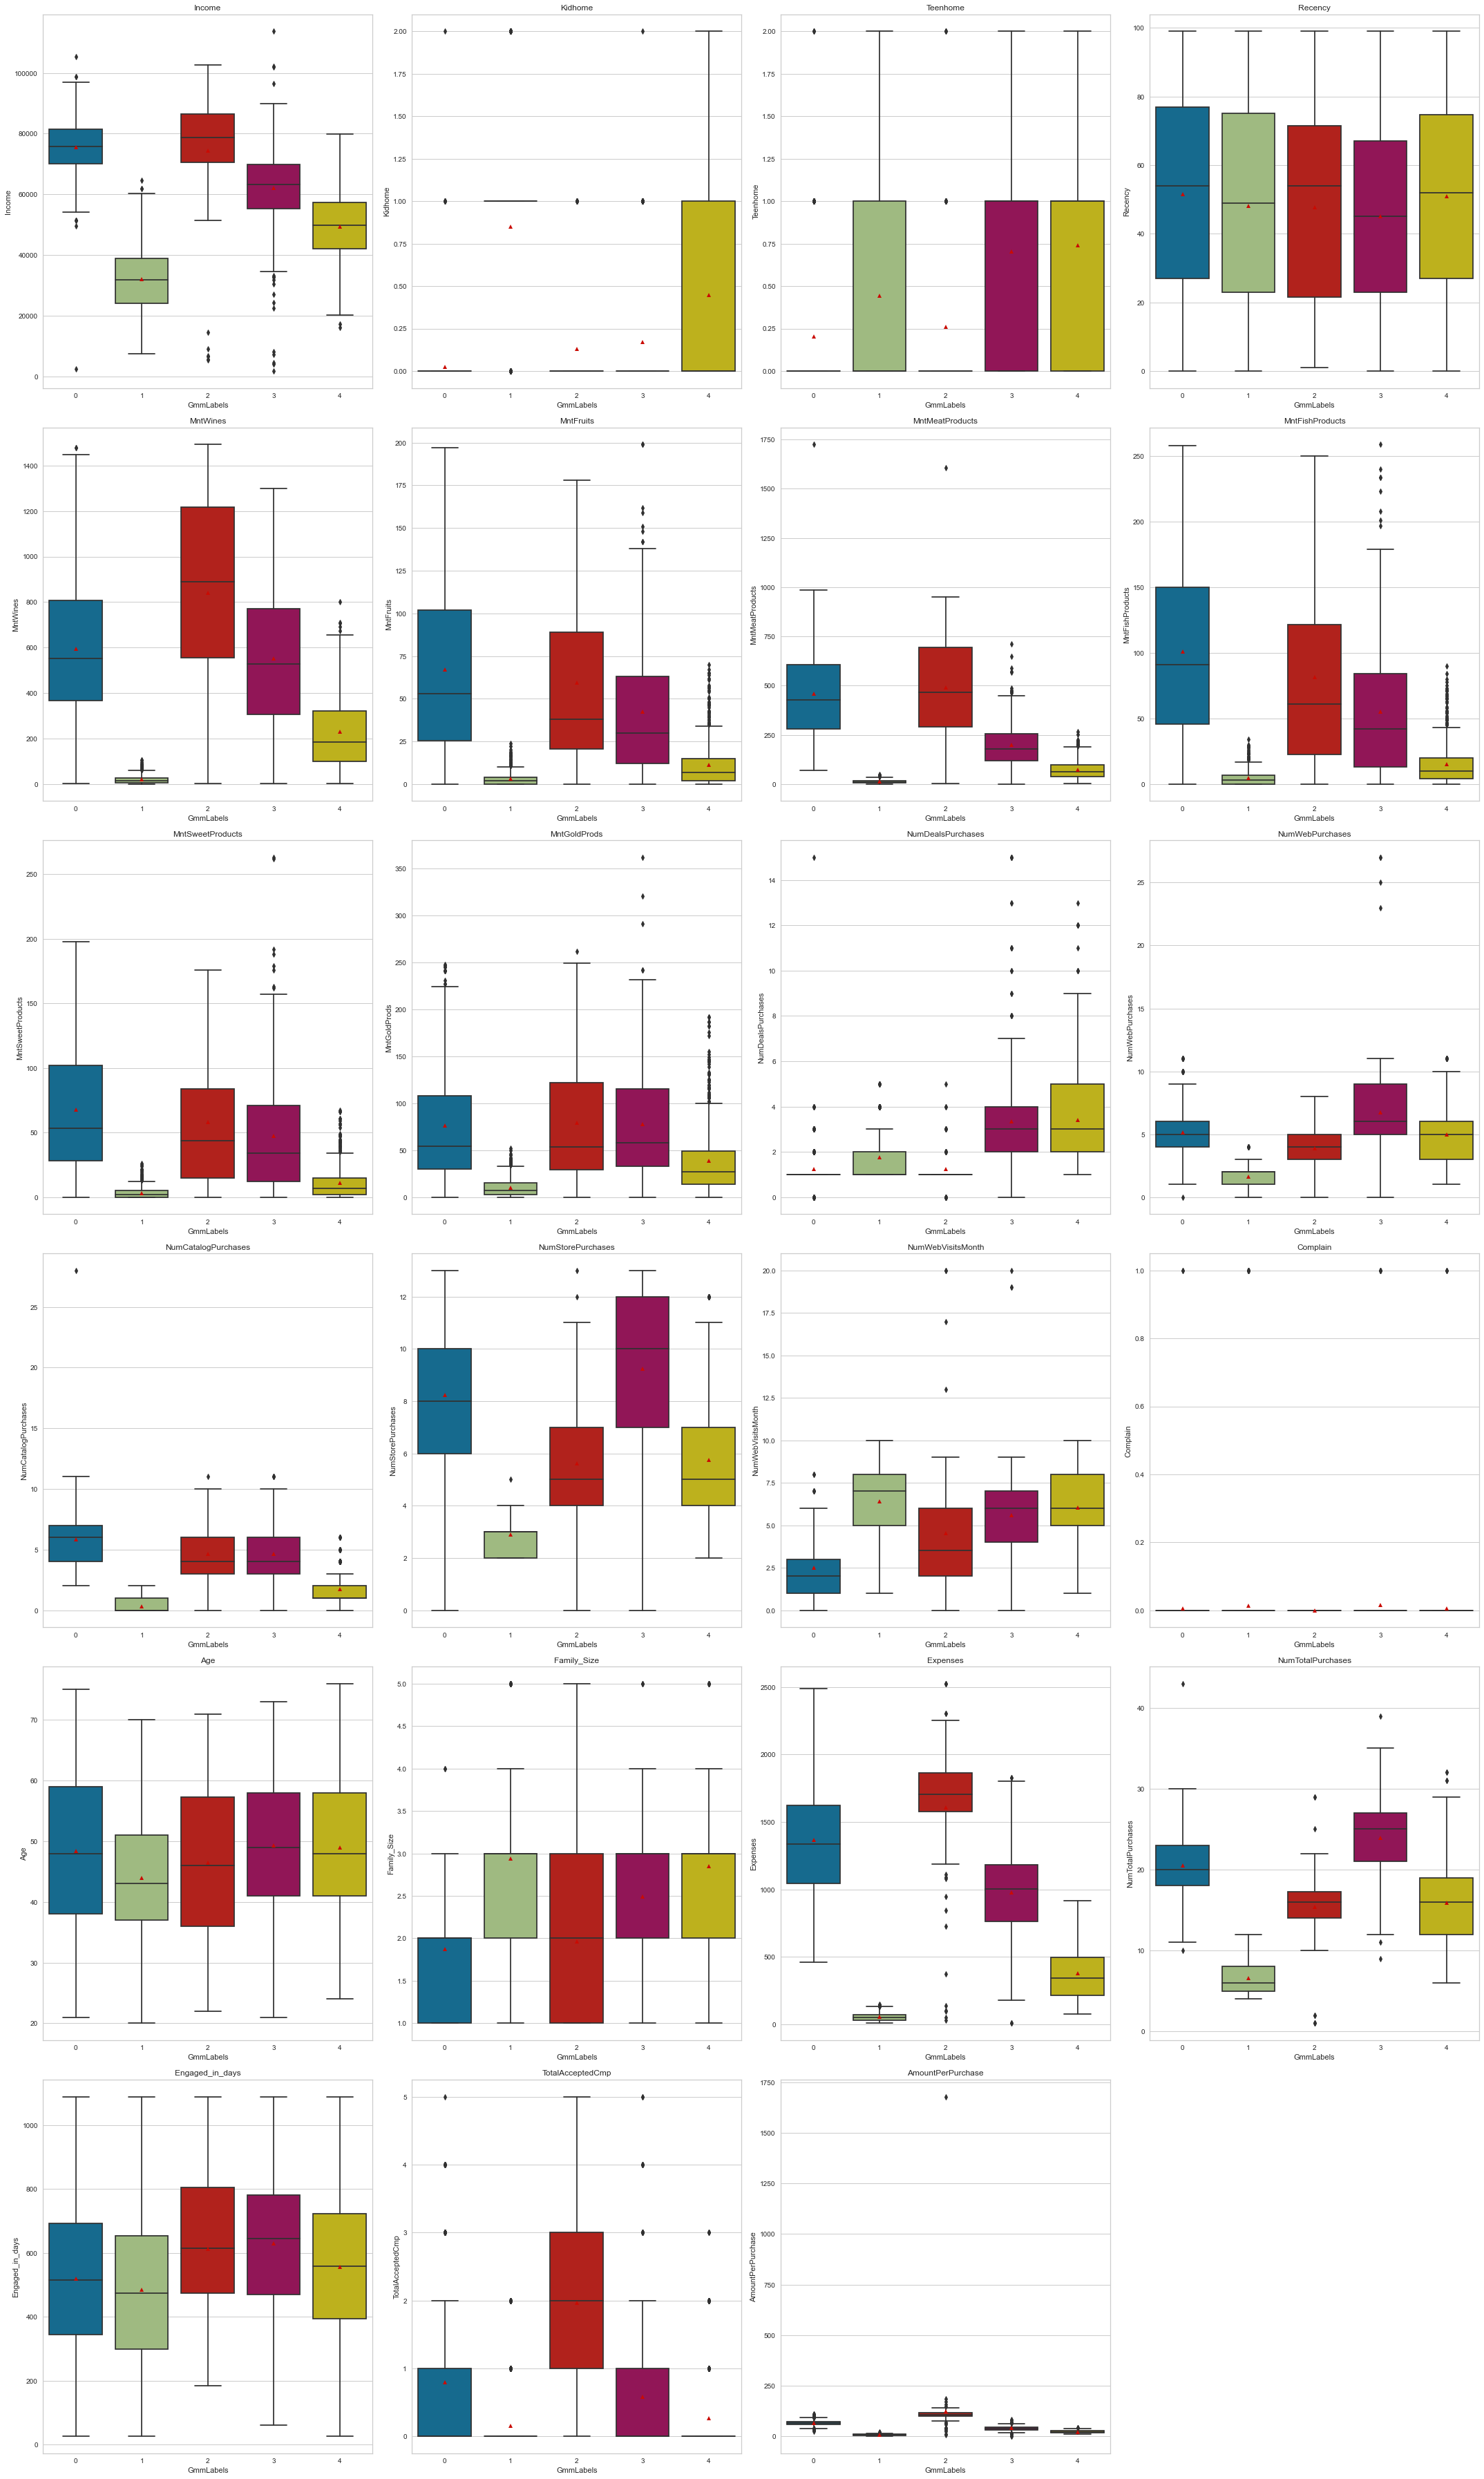

In [133]:
# Create boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['GmmLabels'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()